In [2]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame,date_range
from matplotlib import cm
import seaborn as sns
import scipy as sp
import math
import warnings
import glob,os
from scipy.stats import kstest

warnings.filterwarnings('ignore')

In [ ]:
# Simulation SNP
#allSNP = glob.glob('samtovcf/simulation/MGsim/model.*txt')
#allSNP = glob.glob('samtovcf/simulation/MGbig/model.*txt')
allSNP = glob.glob('samtovcf/simulation/BFsim/model.*txt')
allSNP.sort()
print(allSNP)
allSNPset = pd.DataFrame()
for SNPfile in allSNP:
    SNP = pd.read_csv(SNPfile, sep='\t')
    SNP['Tool']=[x.split('.fasta.')[2].split('.flt')[0].split('.vcf')[0] for x in SNP['sample']]
    SNP['VCF caller'] = ''
    SNP['VCF caller']=[x.replace('bowtie','').replace('minimap','').replace('bwa','').replace('.mappersamtovcf','Variant identifier').replace('.bcfdefault','bcftools default').replace('.indel','bcftools indel') for x in SNP['Tool']]
    SNP['VCF caller']=[x.replace('Variant identifier','VARIANTS').replace('VARIANTS','QuickVariants') for x in SNP['VCF caller']]
    SNP.loc[SNP['Tool'].isin(['bowtie','bwa','minimap']),'VCF caller'] = 'bcftools Mul-ALT'
    SNP['Tool'] = [x.split('.')[0].replace('bowtie','bowtie2').replace('minimap','minimap2') for x in SNP['Tool']]
    Filter = os.path.basename(SNPfile).split('sum.')[1].split('.txt')[0].split('_')
    SNP['Filter criteria'] = 'DP=%s, AF=%s'%(Filter[0],Filter[1])
    allSNPset = allSNPset.append(SNP)
allSNPset.tail()


In [ ]:
pallete_set = {
        'QuickVariants':'#ca0020','bcftools Mul-ALT':'#4d4d4d','bcftools default':'#e0e0e0','bcftools indel':'#878787'}
if True:
    fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(3, 2))
    plt.subplots_adjust(hspace=0.4)
    sns.scatterplot(x='Filter criteria', y='FP', data=allSNPset,ax=axs,
                    hue = 'VCF caller',palette=pallete_set,
                    style = 'Tool')
    axs.set_ylabel('FP point mutations')
    axs.set_xlabel('Filtering criteria')
    plt.sca(axs)
    plt.legend(bbox_to_anchor=(2, 1.0))
    plt.xticks(rotation=90)
    plt.savefig('samtovcf/simulation/FigureSWGSSNPsim.pdf',bbox_inches='tight')


In [ ]:
# Simulation Indels
#allSNP = glob.glob('samtovcf/simulation/MGsim/modelindelsum.*txt')
#allSNP = glob.glob('samtovcf/simulation/MGbig/modelindelsum.*txt')
allSNP = glob.glob('samtovcf/simulation/BFsim/modelindelsum.*txt')
allSNP.sort()
print(allSNP)
allSNPset = pd.DataFrame()
for SNPfile in allSNP:
    SNP = pd.read_csv(SNPfile, sep='\t')
    SNP['Tool'] = [x.replace('bowtie ','bowtie2 ').replace('minimap ','minimap2 ') for x in SNP['Tool']]
    SNP['VCF caller']=[x.replace('bowtie2 VARIANTS','QuickVariants'
                                ).replace('minimap2 VARIANTS','QuickVariants'
                                         ).replace('bwa VARIANTS','QuickVariants'
                                                  ).replace('bowtie2 indel','bcftools indel'
                                ).replace('minimap2 indel','bcftools indel'
                                         ).replace('bwa indel','bcftools indel'
                                                  ).replace('bowtie2 bcfdefault','bcftools default'
                                ).replace('minimap2 bcfdefault','bcftools default'
                                         ).replace('bwa bcfdefault','bcftools default'
                                                  ).replace('bowtie2','bcftools Mul-ALT'
                                ).replace('minimap2','bcftools Mul-ALT'
                                         ).replace('bwa','bcftools Mul-ALT'
                                                  ) for x in SNP['Tool']]
    SNP['Tool'] = [x.split(' ')[0] for x in SNP['Tool']]
    Filter = os.path.basename(SNPfile).split('sum.')[1].split('.txt')[0].split('_')
    SNP['Filter criteria'] = 'DP=%s, AF=%s'%(Filter[0],Filter[1])
    allSNPset = allSNPset.append(SNP)
allSNPset.tail()


In [ ]:
pallete_set = {
        'QuickVariants':'#ca0020','bcftools Mul-ALT':'#4d4d4d','bcftools default':'#e0e0e0','bcftools indel':'#878787'}
if True:
    fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(3, 2))
    plt.subplots_adjust(hspace=0.4)
    sns.scatterplot(x='Filter criteria', y='FP_diffPOS', data=allSNPset,ax=axs,
                    hue = 'VCF caller',palette=pallete_set,
                    style = 'Tool')
    axs.set_ylabel('FP indels')
    axs.set_xlabel('Filtering criteria')
    plt.sca(axs)
    plt.legend(bbox_to_anchor=(2, 1.0))
    plt.xticks(rotation=90)
    plt.savefig('samtovcf/simulation/FigureSWGSINDELsim.pdf',bbox_inches='tight')


In [117]:
# SNPs
folder = 'samtovcf/new//'
SNP=pd.read_csv('%s/model.sum..txt'%(folder), sep='\t')
SNP['Genome']=[x.split('.')[0] for x in SNP['sample']]

if 'covid' in folder:
    SNP['total_refSNP'] = [float(x.split('.fasta.')[1].split('.')[0]) for x in SNP['sample']]
    SNP['total SNPs'] = [int(x) for x in SNP['total_refSNP']]
    SNP['Tool']=[x.split('.fasta.')[2].split('.flt')[0].split('.vcf')[0] for x in SNP['sample']]
    SNP['tooldetauls'] = [x.split('.fasta.')[2] for x in SNP['sample']]
else:
    SNP['total_refSNP'] = [float(x.split('.corrected.')[1].split('.')[0]) for x in SNP['sample']]
    SNP['Tool']=[x.split('SNP.fasta.')[1].split('.flt')[0].split('.vcf')[0] for x in SNP['sample']]
    SNP['tooldetauls'] = [x.split('SNP.fasta.')[1] for x in SNP['sample']]
    ref_snp = pd.read_csv('%s/../ref_snp.txt'%(folder),sep='\t',header=None)
    ref_snp.columns=['total SNPs','sample']
    ref_snp['total SNPs'] = [int(x) for x in ref_snp['total SNPs']]
    SNP['sample'] = [x.split('.SNP.fasta')[0] + '.SNP.fasta.snp.txt' for x in SNP['sample']]
    SNP = SNP.merge(ref_snp,left_on = 'sample',right_on = 'sample',how = 'left')
    
print(SNP['Tool'].unique())
SNP['VCF caller'] = ''
SNP['VCF caller']=[x.replace('bowtie','').replace('minimap','').replace('bwa','').replace('.mappersamtovcf','Variant identifier').replace('.bcfdefault','bcftools default').replace('.indel','bcftools indel') for x in SNP['Tool']]
SNP['VCF caller']=[x.replace('Variant identifier','VARIANTS').replace('VARIANTS','QuickVariants') for x in SNP['VCF caller']]
SNP.loc[SNP['Tool'].isin(['bowtie','bwa','minimap']),'VCF caller'] = 'bcftools Mul-ALT'
SNP['Tool'] = [x.split('.')[0].replace('bowtie','bowtie2').replace('minimap','minimap2') for x in SNP['Tool']]
# filter by duplicate kmers > 10000
SNP = SNP[~SNP['Genome'].isin(['am_BaFr_gS1T203',
                               'H20_BA_g0002',
                               'P63_BA_01','an_EsCo_g0001','cx_BaTh_g0001',
                               'bq_BaTh_g0001'])]
genome_set = {'am_BA_g0003':'BiAd',
                 'am_BaFr_g0050':'BaFr',
                 'am_BaSa_g0015':'BaSa',
             'am_AkMu_g0002':'AkMu','am_BaOv_g0001':'BaOv',
              'am_BaVu_g0002':'BaVu','am_EsCo_g0005':'EsCo',
             'am_PaDi_g0001':'PaDi','SRR2842672':'human',
             'aa_BaFa_g0001':'BaFa-aa','bf_BaFa_g0001':'BaFa',
              'bj_EsCo_g0001':'EsCo','cx_BaXy_g0001':'BaXy','SRR10971381':'SARS-COV-2'}

SNP['Genome'] = [genome_set.get(x,x) for x in SNP['Genome']]
SNP['FPrate']=SNP['FP']/SNP['total SNPs']
SNP['FNrate']=SNP['FN']/SNP['total SNPs']
allgenome = SNP['Genome'].unique()
print(allgenome)
SNP['Tool VCF caller'] = SNP['Tool'] + '-' + SNP['VCF caller']
SNP = SNP.sort_values(['Genome','Tool','VCF caller','total_refSNP'])
SNP=SNP[SNP['total_refSNP']!=0]
print(SNP['Tool'].unique(),SNP['VCF caller'].unique())
SNP.head()


['bwa.indel' 'minimap.indel' 'minimap.mappersamtovcf' 'minimap.bcfdefault'
 'bwa' 'bowtie.indel' 'bowtie.mappersamtovcf' 'bwa.mappersamtovcf'
 'bowtie' 'bowtie.bcfdefault' 'minimap' 'bwa.bcfdefault']
['AkMu' 'BiAd' 'BaFr' 'BaOv' 'BaVu' 'PaDi' 'BaFa' 'EsCo' 'BaXy']
['bowtie2' 'bwa' 'minimap2'] ['QuickVariants' 'bcftools Mul-ALT' 'bcftools default' 'bcftools indel']


sample  FP  FN  total_refSNP  \
64   am_AkMu_g0002.fasta.corrected.1e-06.SNP.fasta....   8   0      0.000001   
99   am_AkMu_g0002.fasta.corrected.2e-06.SNP.fasta....   0   0      0.000002   
142  am_AkMu_g0002.fasta.corrected.3e-06.SNP.fasta....   0   0      0.000003   
173  am_AkMu_g0002.fasta.corrected.4e-06.SNP.fasta....   0   0      0.000004   
229  am_AkMu_g0002.fasta.corrected.5e-06.SNP.fasta....   0   0      0.000005   

    Genome     Tool                          tooldetauls  total SNPs  \
64    AkMu  bowtie2  bowtie.mappersamtovcf.vcf.final.vcf          24   
99    AkMu  bowtie2  bowtie.mappersamtovcf.vcf.final.vcf          24   
142   AkMu  bowtie2  bowtie.mappersamtovcf.vcf.final.vcf          27   
173   AkMu  bowtie2  bowtie.mappersamtovcf.vcf.final.vcf          29   
229   AkMu  bowtie2  bowtie.mappersamtovcf.vcf.final.vcf          30   

        VCF caller    FPrate  FNrate        Tool VCF caller  
64   QuickVariants  0.333333     0.0  bowtie2-QuickVariants  
99   QuickVariants  0.000000     0.0  bowtie2-QuickVariants  
142  QuickVariants  0.000000     0.0  bowtie2-QuickVariants  
173  QuickVariants  0.000000     0.0  bowtie2-QuickVariants  
229  QuickVariants  0.000000     0.0  bowtie2-QuickVariants

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


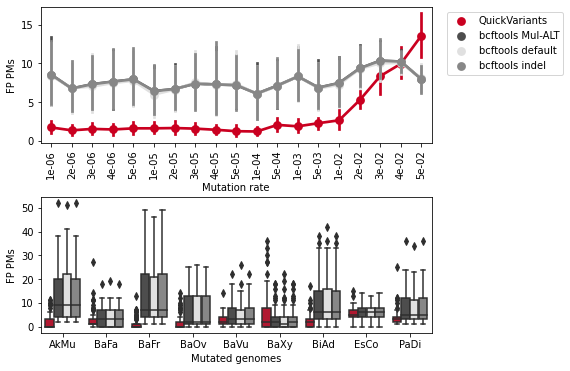

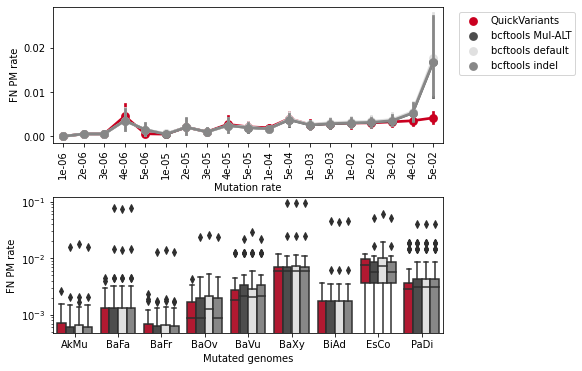

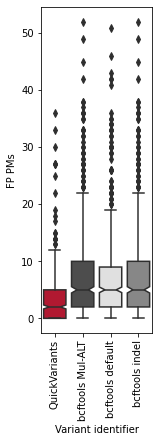

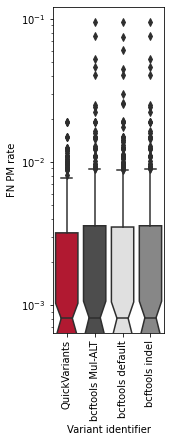

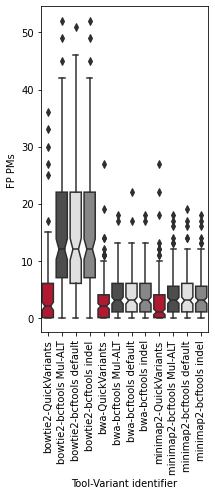

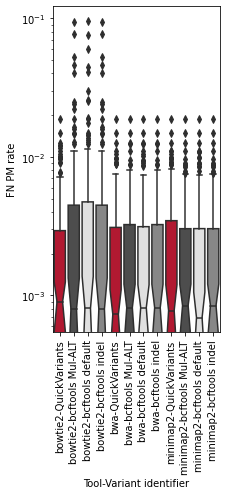

In [118]:
# plot FP
pallete_set = {
        'QuickVariants':'#ca0020','bcftools Mul-ALT':'#4d4d4d','bcftools default':'#e0e0e0','bcftools indel':'#878787'}


for genome in allgenome:
    SNPsub = SNP[SNP['Genome']==genome]
# plot FN sum for mutations and genomes
if 'covid' not in folder:
    SNP['total_refSNP']=['%.0e'%(x) for x in SNP['total_refSNP']]
    fig, axs = plt.subplots(nrows=2,ncols = 1,figsize=(7, 6))
    plt.subplots_adjust(hspace=0.4)
    sns.pointplot(x='total_refSNP', y='FP', data=SNP,ax=axs[0],hue = 'VCF caller',palette=pallete_set)
    axs[0].set_xlabel('Mutation rate') 
    axs[0].set_ylabel('FP PMs')
    plt.sca(axs[0])
    plt.legend(bbox_to_anchor=(1.35, 1.0))
    sns.boxplot(x='Genome', y='FP', data=SNP,ax=axs[1],hue = 'VCF caller',palette=pallete_set)
    axs[1].set_xlabel('Mutated genomes') 
    axs[1].set_ylabel('FP PMs')
    axs[1].get_legend().remove()
    plt.xticks(rotation=90)
    plt.savefig('%s/Figure 3a.pdf'%(folder),bbox_inches='tight')
    # plot FP sum for mutations and genomes
    fig, axs = plt.subplots(nrows=2,ncols = 1,figsize=(7, 6))
    plt.subplots_adjust(hspace=0.4)
    sns.pointplot(x='total_refSNP', y='FNrate', data=SNP,ax=axs[0],hue = 'VCF caller',palette=pallete_set)
    axs[0].set_xlabel('Mutation rate') 
    axs[0].set_ylabel('FN PM rate')
    #axs[0].set(yscale="log")
    plt.sca(axs[0])
    plt.legend(bbox_to_anchor=(1.35, 1.0))
    sns.boxplot(x='Genome', y='FNrate', data=SNP,ax=axs[1],hue = 'VCF caller',palette=pallete_set)
#     for i, artist in enumerate(axs[1].artists):
#         # Hue-level colors are repeated every (number of levels in 'Genome') times.
#         # Get the hue level for this box by taking modulo
#         hue_level = i % len(pallete_set.keys())
#         # Get the color corresponding to this hue level from your custom palette
#         color = list(pallete_set.values())[hue_level]
#         # Change the outline color
#         artist.set_edgecolor(color)
#         # Each box has 6 associated Line2D objects (whiskers, fliers, etc.)
#         # Update the color for those as well
#         for j in range(i * 6, i * 6 + 6):
#             line = axs[1].lines[j]
#             line.set_color(color)
#             line.set_mfc(color)
#             line.set_mec(color)
    axs[1].set_xlabel('Mutated genomes') 
    axs[1].set_ylabel('FN PM rate')
    axs[1].set(yscale="log")
    axs[1].get_legend().remove()
    plt.xticks(rotation=90)
    plt.savefig('%s/Figure 3b.eps'%(folder),bbox_inches='tight',format='eps')
    # plot FP sum for mutations and genomes
    fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(2, 6))
    sns.boxplot(x='VCF caller', y='FP', notch = True, data=SNP,ax=axs,hue = 'VCF caller',dodge=False,palette = pallete_set)
    axs.set_xlabel('Variant identifier') 
    axs.set_ylabel('FP PMs')
    plt.xticks(rotation=90)
    axs.get_legend().remove()
    #plt.sca(axs)
    #plt.legend(bbox_to_anchor=(1.4, 1.0))
    plt.savefig('%s/Figure 3c.pdf'%(folder),bbox_inches='tight')
    fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(2, 6))
    sns.boxplot(x='VCF caller', y='FNrate', notch = True, data=SNP,ax=axs,hue = 'VCF caller',dodge=False,palette=pallete_set)
    axs.set_xlabel('Variant identifier') 
    axs.set_ylabel('FN PM rate')
    axs.set(yscale="log")
    plt.xticks(rotation=90)
    axs.get_legend().remove()
    plt.savefig('%s/Figure 3d.eps'%(folder),bbox_inches='tight',format='eps')
    # plot FP sum for mutations and genomes
    fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(3, 6))
    sns.boxplot(x='Tool VCF caller', y='FP', notch = True, data=SNP,ax=axs,hue = 'VCF caller',dodge=False,palette = pallete_set)
    axs.set_xlabel('Tool-Variant identifier') 
    axs.set_ylabel('FP PMs')
    plt.xticks(rotation=90)
    axs.get_legend().remove()
    #plt.sca(axs)
    #plt.legend(bbox_to_anchor=(1.4, 1.0))
    plt.savefig('%s/Figure S3a.pdf'%(folder),bbox_inches='tight')
    fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(3, 6))
    sns.boxplot(x='Tool VCF caller', y='FNrate', notch = True, data=SNP,ax=axs,hue = 'VCF caller',dodge=False,palette=pallete_set)
    axs.set_xlabel('Tool-Variant identifier') 
    axs.set_ylabel('FN PM rate')
    axs.set(yscale="log")
    plt.xticks(rotation=90)
    axs.get_legend().remove()
    plt.savefig('%s/Figure S3b.eps'%(folder),bbox_inches='tight',format='eps')
else:
    # plot FP
    SNP['FPrate'] = SNP['FP']/SNP['total_refSNP']
    SNP['FNrate'] = SNP['FN']/SNP['total_refSNP']
    SNP = SNP[SNP['total_refSNP']!=0]
    SNP['total_refSNP']=[int(x) for x in SNP['total_refSNP']]
    # plot FP sum for mutations and genomes
    fig, axs = plt.subplots(nrows=1,ncols = 2,figsize=(5,2),gridspec_kw={'width_ratios': [1, 2]})
    plt.subplots_adjust(wspace=0.3)
    sns.boxplot(x='VCF caller', y='FP',notch = True,  data=SNP,ax=axs[0],hue = 'VCF caller',dodge=False,palette=pallete_set)
    axs[0].set_xlabel('Variant identifier') 
    axs[0].set_ylabel('FP PMs')
    axs[0].get_legend().remove()
    sns.pointplot(x='total_refSNP', y='FP', data=SNP,ax=axs[1],hue = 'VCF caller',palette=pallete_set)
    axs[1].set_xlabel('No. mutations') 
    axs[1].set_ylabel('FP PMs')
    plt.sca(axs[1])
    plt.legend(bbox_to_anchor=(1.1, 1.0))
    plt.xticks(rotation=90)
    plt.sca(axs[0])
    plt.xticks(rotation=90)
    plt.savefig('%s/Figure 4c.pdf'%(folder),bbox_inches='tight')

    # plot FN sum for mutations and genomes
    fig, axs = plt.subplots(nrows=1,ncols = 2,figsize=(5,2),gridspec_kw={'width_ratios': [1, 2]})
    plt.subplots_adjust(wspace=0.3)
    sns.boxplot(x='VCF caller', y='FN',notch = True,  data=SNP,ax=axs[0],hue = 'VCF caller',dodge=False,palette=pallete_set)
    axs[0].set_xlabel('Variant identifier') 
    axs[0].set_ylabel('FN PMs')
    axs[0].get_legend().remove()
    sns.pointplot(x='total_refSNP', y='FN', data=SNP,ax=axs[1],hue = 'VCF caller',palette=pallete_set)
    axs[1].set_xlabel('No. mutations') 
    axs[1].set_ylabel('FN PMs')
    plt.sca(axs[0])
    plt.xticks(rotation=90)
    plt.sca(axs[1])
    plt.legend(bbox_to_anchor=(1.1, 1.0))
    plt.xticks(rotation=90)
    plt.savefig('%s/Figure 4d.eps'%(folder),bbox_inches='tight',format='eps')


In [119]:
# MO
SNPspecies = pd.DataFrame(SNP.groupby(['total_refSNP','VCF caller'])['FNrate'].median())
SNPspecies.reset_index(inplace=True)
print(kstest(SNPspecies.loc[SNPspecies['VCF caller']=='QuickVariants','FNrate'],
      SNPspecies.loc[SNPspecies['VCF caller']=='bcftools Mul-ALT','FNrate'])
)
for VCFcaller in SNPspecies['VCF caller'].unique():
    SNPspeciessub = SNPspecies[SNPspecies['VCF caller']==VCFcaller]
    print(VCFcaller,np.quantile(SNPspeciessub['FNrate'],[0.05,0.5,0.95]),
          np.mean(SNPspeciessub['FNrate']),np.std(SNPspeciessub['FNrate']))
    

KstestResult(statistic=0.10526315789473684, pvalue=0.9999851666689215)
QuickVariants [0.         0.         0.00283921] 0.000961486875920531 0.0011255044830701265
bcftools Mul-ALT [0.         0.         0.00368513] 0.0011189854262811153 0.0013712116214735373
bcftools default [0.         0.         0.00328391] 0.0011432476074533556 0.0013669323844775292
bcftools indel [0.         0.         0.00368513] 0.0011189854262811153 0.0013712116214735373


In [120]:
# MO
SNPspecies = pd.DataFrame(SNP.groupby(['total_refSNP','VCF caller'])['FP'].median())
SNPspecies.reset_index(inplace=True)
print(kstest(SNPspecies.loc[SNPspecies['VCF caller']=='QuickVariants','FP'],
      SNPspecies.loc[SNPspecies['VCF caller']=='bcftools Mul-ALT','FP'])
)
for VCFcaller in SNPspecies['VCF caller'].unique():
    SNPspeciessub = SNPspecies[SNPspecies['VCF caller']==VCFcaller]
    print(VCFcaller,np.quantile(SNPspeciessub['FP'],[0.05,0.5,0.95]),np.mean(SNPspeciessub['FP']),np.std(SNPspeciessub['FP']))
    

KstestResult(statistic=0.7368421052631579, pvalue=2.8402221176801622e-05)
QuickVariants [0.9 1.  8.3] 2.4210526315789473 2.943606621917803
bcftools Mul-ALT [2.9 4.  8.2] 5.0 2.1026299321513875
bcftools default [2.9 4.  8.2] 5.0 2.127513992779762
bcftools indel [2.9 4.  8.2] 5.0 2.1026299321513875


In [121]:
# MO
print(kstest(SNP.loc[SNP['VCF caller']=='QuickVariants','FP'],
      SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FP'])
)
print(kstest(SNP.loc[SNP['VCF caller']=='QuickVariants','FNrate'],
      SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FNrate'])
)
print(kstest(SNP.loc[SNP['VCF caller']=='bcftools default','FP'],
      SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FP'])
)
print(kstest(SNP.loc[SNP['VCF caller']=='bcftools default','FNrate'],
      SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FNrate'])
)

KstestResult(statistic=0.29434697855750486, pvalue=5.358028544804125e-20)
KstestResult(statistic=0.03898635477582846, pvalue=0.8309463479786875)
KstestResult(statistic=0.01364522417153996, pvalue=0.9999999999443507)
KstestResult(statistic=0.025341130604288498, pvalue=0.9966107799426185)


In [122]:
# MO
print(np.quantile(SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FP'],[0.5])/
      np.quantile(SNP.loc[SNP['VCF caller']=='QuickVariants','FP'],[0.5]),
      np.quantile(SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FNrate'],[0.5])/
      np.quantile(SNP.loc[SNP['VCF caller']=='QuickVariants','FNrate'],[0.5]),
      np.quantile(SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FP'],[0.5])/
      np.quantile(SNP.loc[SNP['VCF caller']=='bcftools default','FP'],[0.5]),
      np.quantile(SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FNrate'],[0.5])/
      np.quantile(SNP.loc[SNP['VCF caller']=='bcftools default','FNrate'],[0.5]),
     )

print('FP',np.quantile(SNP.loc[SNP['VCF caller']=='QuickVariants','FP'],[0.05,0.5,0.95]),
         np.quantile(SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FP'],[0.05,0.5,0.95]),
      np.quantile(SNP.loc[SNP['VCF caller']=='bcftools indel','FP'],[0.05,0.5,0.95]),
         np.quantile(SNP.loc[SNP['VCF caller']=='bcftools default','FP'],[0.05,0.5,0.95]))
print('FNrate',np.quantile(SNP.loc[SNP['VCF caller']=='QuickVariants','FNrate'],[0.05,0.5,0.95])*100,
      np.quantile(SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FNrate'],[0.05,0.5,0.95])*100,
         np.quantile(SNP.loc[SNP['VCF caller']=='bcftools indel','FNrate'],[0.05,0.5,0.95])*100,
         np.quantile(SNP.loc[SNP['VCF caller']=='bcftools default','FNrate'],[0.05,0.5,0.95])*100)


[2.5] [1.01111386] [1.] [1.01111386]
FP [ 0.  2. 11.] [ 0.  5. 27.] [ 0.  5. 27.] [ 0.  5. 29.]
FNrate [0.         0.08071956 0.98505994] [0.         0.08161666 1.08743473] [0.         0.08161666 1.08743473] [0.         0.08071956 1.13016394]


In [123]:
SNP['total_refSNP'].unique()

array(['1e-06', '2e-06', '3e-06', '4e-06', '5e-06', '1e-05', '2e-05',
       '3e-05', '4e-05', '5e-05', '1e-04', '5e-04', '1e-03', '5e-03',
       '1e-02', '2e-02', '3e-02', '4e-02', '5e-02'], dtype=object)

In [124]:
# MO
SNPsub = SNP[SNP['total_refSNP'].isin(['1e-06', '2e-06', '3e-06', '4e-06', '5e-06', '1e-05', '2e-05',
       '3e-05', '4e-05', '5e-05', '1e-04', '5e-04', '1e-03', '5e-03',
       '1e-02', '2e-02', '3e-02'])]
print('FP',np.quantile(SNPsub.loc[SNPsub['VCF caller']=='QuickVariants','FP'],[0.05,0.5,0.95]),
         np.quantile(SNPsub.loc[SNPsub['VCF caller']=='bcftools Mul-ALT','FP'],[0.05,0.5,0.95]))
print('FNrate',np.quantile(SNPsub.loc[SNPsub['VCF caller']=='QuickVariants','FNrate'],[0.05,0.5,0.95])*100,
         np.quantile(SNPsub.loc[SNPsub['VCF caller']=='bcftools Mul-ALT','FNrate'],[0.05,0.5,0.95])*100,
         np.quantile(SNPsub.loc[SNPsub['VCF caller']=='bcftools default','FNrate'],[0.05,0.5,0.95])*100)
print(kstest(SNPsub.loc[SNPsub['VCF caller']=='QuickVariants','FP'],
      SNPsub.loc[SNPsub['VCF caller']=='bcftools Mul-ALT','FP'])
)
print(kstest(SNPsub.loc[SNPsub['VCF caller']=='QuickVariants','FNrate'],
      SNPsub.loc[SNPsub['VCF caller']=='bcftools Mul-ALT','FNrate'])
)

FP [0. 1. 8.] [ 0.   4.  28.1]
FNrate [0.         0.         0.97111001] [0.         0.         0.87758212] [0.         0.         0.97111001]
KstestResult(statistic=0.33986928104575165, pvalue=6.861133974318046e-24)
KstestResult(statistic=0.02832244008714597, pvalue=0.9929336649296961)


In [125]:
# MO
SNPsub = SNP[SNP['total_refSNP'].isin(['1e-06', '2e-06', '3e-06', '4e-06', '5e-06', '1e-05', '2e-05',
       '3e-05', '4e-05', '5e-05', '1e-04'])]
print('FP',np.quantile(SNPsub.loc[SNPsub['VCF caller']=='QuickVariants','FP'],[0.05,0.5,0.95]),
         np.quantile(SNPsub.loc[SNPsub['VCF caller']=='bcftools Mul-ALT','FP'],[0.05,0.5,0.95]))
print('FNrate',np.quantile(SNPsub.loc[SNPsub['VCF caller']=='QuickVariants','FNrate'],[0.05,0.5,0.95])*100,
         np.quantile(SNPsub.loc[SNPsub['VCF caller']=='bcftools Mul-ALT','FNrate'],[0.05,0.5,0.95])*100,
         np.quantile(SNPsub.loc[SNPsub['VCF caller']=='bcftools default','FNrate'],[0.05,0.5,0.95])*100)
print(kstest(SNPsub.loc[SNPsub['VCF caller']=='QuickVariants','FP'],
      SNPsub.loc[SNPsub['VCF caller']=='bcftools Mul-ALT','FP'])
)
print(kstest(SNPsub.loc[SNPsub['VCF caller']=='QuickVariants','FNrate'],
      SNPsub.loc[SNPsub['VCF caller']=='bcftools Mul-ALT','FNrate'])
)

FP [0. 1. 5.] [ 0.  4. 29.]
FNrate [0.         0.         0.98522167] [0.         0.         0.72992701] [0.         0.         0.90846047]
KstestResult(statistic=0.3939393939393939, pvalue=5.8579276698655384e-21)
KstestResult(statistic=0.016835016835016835, pvalue=0.9999999999986139)


In [126]:
# MO
SNPsub = SNP[SNP['total_refSNP'].isin(['5e-04', '1e-03', '5e-03',
       '1e-02', '2e-02', '3e-02'])]
print('FP',np.quantile(SNPsub.loc[SNPsub['VCF caller']=='QuickVariants','FP'],[0.05,0.5,0.95]),
         np.quantile(SNPsub.loc[SNPsub['VCF caller']=='bcftools Mul-ALT','FP'],[0.05,0.5,0.95]))
print('FNrate',np.quantile(SNPsub.loc[SNPsub['VCF caller']=='QuickVariants','FNrate'],[0.05,0.5,0.95])*100,
         np.quantile(SNPsub.loc[SNPsub['VCF caller']=='bcftools Mul-ALT','FNrate'],[0.05,0.5,0.95])*100,
         np.quantile(SNPsub.loc[SNPsub['VCF caller']=='bcftools default','FNrate'],[0.05,0.5,0.95])*100)
print(kstest(SNPsub.loc[SNPsub['VCF caller']=='QuickVariants','FP'],
      SNPsub.loc[SNPsub['VCF caller']=='bcftools Mul-ALT','FP'])
)
print(kstest(SNPsub.loc[SNPsub['VCF caller']=='QuickVariants','FNrate'],
      SNPsub.loc[SNPsub['VCF caller']=='bcftools Mul-ALT','FNrate'])
)

FP [0.   3.   9.95] [ 0.05  6.   27.  ]
FNrate [0.03865113 0.18815512 0.92345887] [0.03627596 0.20891159 0.89516971] [0.03616637 0.21020189 0.97601913]
KstestResult(statistic=0.30864197530864196, pvalue=3.2356734151308403e-07)
KstestResult(statistic=0.07407407407407407, pvalue=0.7674417564810085)


In [127]:
for Tool in SNP['Tool'].unique():
    SNPsub = SNP[SNP['Tool']==Tool]
    print(Tool,'FP',np.quantile(SNPsub.loc[SNPsub['VCF caller']=='QuickVariants','FP'],[0.05,0.5,0.95]),
         np.quantile(SNPsub.loc[SNPsub['VCF caller']=='bcftools Mul-ALT','FP'],[0.05,0.5,0.95]),
         np.quantile(SNPsub.loc[SNPsub['VCF caller']=='bcftools default','FP'],[0.05,0.5,0.95]))
    print(Tool,'FNrate',np.quantile(SNPsub.loc[SNPsub['VCF caller']=='QuickVariants','FNrate'],[0.05,0.5,0.95])*100,
             np.quantile(SNPsub.loc[SNPsub['VCF caller']=='bcftools Mul-ALT','FNrate'],[0.05,0.5,0.95])*100,
             np.quantile(SNPsub.loc[SNPsub['VCF caller']=='bcftools default','FNrate'],[0.05,0.5,0.95])*100)



bowtie2 FP [ 0.  2. 14.] [ 2. 12. 36.] [ 2.  12.  34.5]
bowtie2 FNrate [0.         0.08989347 1.00461857] [0.         0.07989251 1.76827438] [0.         0.08071956 1.90266596]
bwa FP [ 0.   2.  10.5] [ 0.  3. 11.] [ 0.  3. 11.]
bwa FNrate [0.         0.07303535 0.91462181] [0.         0.08161666 0.8074481 ] [0.         0.0817409  0.93087969]
minimap2 FP [ 0.  1. 10.] [ 0.  3. 11.] [ 0.   3.  11.5]
minimap2 FNrate [0.         0.07786964 0.96539137] [0.         0.08456335 0.85266238] [0.         0.06921746 0.90620814]


In [128]:
from scipy.stats import kstest
print(kstest(SNP.loc[(SNP['Tool']=='bowtie2') & (SNP['VCF caller']=='bcftools Mul-ALT'),'FP'],
      SNP.loc[(SNP['Tool']!='bowtie2') & (SNP['VCF caller']=='bcftools Mul-ALT'),'FP'])
)
print(kstest(SNP.loc[(SNP['Tool']=='bwa') & (SNP['VCF caller']=='bcftools Mul-ALT'),'FP'],
      SNP.loc[(SNP['Tool']=='minimap2') & (SNP['VCF caller']=='bcftools Mul-ALT'),'FP'])
)
from scipy.stats import kstest
print(kstest(SNP.loc[(SNP['Tool']=='bowtie2') & (SNP['VCF caller']=='QuickVariants'),'FP'],
      SNP.loc[(SNP['Tool']!='bowtie2') & (SNP['VCF caller']=='QuickVariants'),'FP'])
)
print(kstest(SNP.loc[(SNP['Tool']=='bwa') & (SNP['VCF caller']=='QuickVariants'),'FP'],
      SNP.loc[(SNP['Tool']=='minimap2') & (SNP['VCF caller']=='QuickVariants'),'FP'])
)

KstestResult(statistic=0.5672514619883041, pvalue=1.1102230246251565e-15)
KstestResult(statistic=0.04093567251461988, pvalue=0.9988781909888858)
KstestResult(statistic=0.10818713450292397, pvalue=0.13540997539645416)
KstestResult(statistic=0.1286549707602339, pvalue=0.11801065325697994)


In [129]:
from scipy.stats import kstest
print(kstest(SNP.loc[(SNP['Tool']=='bowtie2') & (SNP['VCF caller']=='bcftools Mul-ALT'),'FNrate'],
      SNP.loc[(SNP['Tool']!='bowtie2') & (SNP['VCF caller']=='bcftools Mul-ALT'),'FNrate'])
)
print(kstest(SNP.loc[(SNP['Tool']=='bwa') & (SNP['VCF caller']=='bcftools Mul-ALT'),'FNrate'],
      SNP.loc[(SNP['Tool']=='minimap2') & (SNP['VCF caller']=='bcftools Mul-ALT'),'FNrate'])
)
from scipy.stats import kstest
print(kstest(SNP.loc[(SNP['Tool']=='bowtie2') & (SNP['VCF caller']=='QuickVariants'),'FNrate'],
      SNP.loc[(SNP['Tool']!='bowtie2') & (SNP['VCF caller']=='QuickVariants'),'FNrate'])
)
print(kstest(SNP.loc[(SNP['Tool']=='bwa') & (SNP['VCF caller']=='QuickVariants'),'FNrate'],
      SNP.loc[(SNP['Tool']=='minimap2') & (SNP['VCF caller']=='QuickVariants'),'FNrate'])
)

KstestResult(statistic=0.10526315789473684, pvalue=0.15623395625078762)
KstestResult(statistic=0.029239766081871343, pvalue=0.9999996734018008)
KstestResult(statistic=0.05263157894736842, pvalue=0.9055451291555392)
KstestResult(statistic=0.05263157894736842, pvalue=0.9725604546148136)


In [130]:
# MO
SNPspecies = pd.DataFrame(SNP.groupby(['Genome','VCF caller'])['FNrate'].median())
SNPspecies.reset_index(inplace=True)
for VCFcaller in SNPspecies['VCF caller'].unique():
    SNPspeciessub = SNPspecies[SNPspecies['VCF caller']==VCFcaller]
    print(VCFcaller,
          np.quantile(SNPspeciessub['FNrate'],[0.05,0.5,0.95])*100,
          np.mean(SNPspeciessub['FNrate'])*100,
          np.std(SNPspeciessub['FNrate'])
         )
SNPspecies = pd.DataFrame(SNP.groupby(['Genome','VCF caller'])['FP'].median())
SNPspecies.reset_index(inplace=True)
for VCFcaller in SNPspecies['VCF caller'].unique():
    SNPspeciessub = SNPspecies[SNPspecies['VCF caller']==VCFcaller]
    print(VCFcaller,
         np.quantile(SNPspeciessub['FP'],[0.05,0.5,0.95]),
          np.mean(SNPspeciessub['FP']),
          np.std(SNPspeciessub['FP'])
         )

QuickVariants [0.         0.08764242 0.70062402] 0.21348382020916884 0.002710429604501284
bcftools Mul-ALT [0.         0.08764242 0.58402426] 0.19747994358645585 0.0023024895283989717
bcftools default [0.         0.12515645 0.67534493] 0.21853546344281818 0.0026054535832188037
bcftools indel [0.         0.08764242 0.58402426] 0.19747994358645585 0.0023024895283989717
QuickVariants [0.  2.  4.2] 1.6666666666666667 1.5634719199411433
bcftools Mul-ALT [2.  5.  8.2] 4.777777777777778 2.2986845406196887
bcftools default [1.4 5.  8.2] 4.666666666666667 2.449489742783178
bcftools indel [2.  5.  8.2] 4.777777777777778 2.2986845406196887


In [120]:
# covid

print('FP',np.quantile(SNP.loc[SNP['VCF caller']=='QuickVariants','FP'],[0.05,0.5,0.95]),
         np.quantile(SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FP'],[0.05,0.5,0.95]),
     np.quantile(SNP.loc[SNP['VCF caller']=='bcftools indel','FP'],[0.05,0.5,0.95]),
     np.quantile(SNP.loc[SNP['VCF caller']=='bcftools default','FP'],[0.05,0.5,0.95]))
print('FN',np.quantile(SNP.loc[SNP['VCF caller']=='QuickVariants','FN'],[0.05,0.5,0.95]),
         np.quantile(SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FN'],[0.05,0.5,0.95]),
      np.quantile(SNP.loc[SNP['VCF caller']=='bcftools indel','FN'],[0.05,0.5,0.95]),
     np.quantile(SNP.loc[SNP['VCF caller']=='bcftools default','FN'],[0.05,0.5,0.95]))
print(kstest(SNP.loc[SNP['VCF caller']=='QuickVariants','FP'],
      SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FP'])
)
print(kstest(SNP.loc[SNP['VCF caller']=='QuickVariants','FNrate'],
      SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FNrate'])
)


FP [0. 0. 1.] [0. 0. 4.] [0. 0. 4.] [0. 0. 3.]
FN [0. 1. 3.] [0.  0.5 3. ] [0.  0.5 3. ] [0. 0. 3.]
KstestResult(statistic=0.19166666666666668, pvalue=0.024139111559378406)
KstestResult(statistic=0.025, pvalue=0.9999999999999869)


In [131]:
# indels
folder = 'samtovcf/new/'
SNP=pd.read_csv(glob.glob('%s/modelindelsum*.txt'%(folder))[0], sep='\t')

SNP['Genome']=[x.split('.')[0] for x in SNP['Sample']]
SNP = SNP[SNP['Genome'] != 'am_BaFr_gS1T203']
SNP = SNP[SNP['Genome'] != 'H20_BA_g0002']
if 'covid' in folder:
    SNP['total_refSNP'] = [float(x.split('.fasta.')[1].split('.')[0]) for x in SNP['Sample']]
    SNP['FNrate']=SNP['FN']/20
else:
    SNP['total_refSNP'] = [float(x.split('.corrected.')[1].split('.')[0]) for x in SNP['Sample']]
    SNP['FN'] = SNP['FN']
    SNP['FNrate']=SNP['FN']/200
    #SNP = SNP[SNP['total_refSNP']!=4e-02][SNP['total_refSNP']!=1e-02]
    print(SNP['total_refSNP'].unique())
    ref_snp = pd.read_csv('samtovcf/ref_snp.txt',sep='\t',header=None)
    ref_snp.columns=['total SNPs','sample']
    ref_snp['total SNPs'] = [int(x) for x in ref_snp['total SNPs']]
#SNP = SNP.sort_values('Tool')
genome_set = {'am_BA_g0003':'BiAd',
                 'am_BaFr_g0050':'BaFr',
                 'am_BaSa_g0015':'BaSa',
             'am_AkMu_g0002':'AkMu','am_BaOv_g0001':'BaOv',
              'am_BaVu_g0002':'BaVu','am_EsCo_g0005':'EsCo',
             'am_PaDi_g0001':'PaDi','SRR2842672':'human',
             'aa_BaFa_g0001':'BaFa-aa','bf_BaFa_g0001':'BaFa',
              'bj_EsCo_g0001':'EsCo','cx_BaXy_g0001':'BaXy','SRR10971381':'SARS-COV-2'}
SNP['Genome'] = [genome_set[x] for x in SNP['Genome']]
allgenome = SNP['Genome'].unique()
print(SNP['Tool'].unique())
SNP['VCF caller'] = ''
SNP['Tool'] = [x.replace('bowtie ','bowtie2 ').replace('minimap ','minimap2 ') for x in SNP['Tool']]
SNP['VCF caller']=[x.replace('bowtie2 VARIANTS','QuickVariants'
                            ).replace('minimap2 VARIANTS','QuickVariants'
                                     ).replace('bwa VARIANTS','QuickVariants'
                                              ).replace('bowtie2 indel','bcftools indel'
                            ).replace('minimap2 indel','bcftools indel'
                                     ).replace('bwa indel','bcftools indel'
                                              ).replace('bowtie2 bcfdefault','bcftools default'
                            ).replace('minimap2 bcfdefault','bcftools default'
                                     ).replace('bwa bcfdefault','bcftools default'
                                              ).replace('bowtie2','bcftools Mul-ALT'
                            ).replace('minimap2','bcftools Mul-ALT'
                                     ).replace('bwa','bcftools Mul-ALT'
                                              ) for x in SNP['Tool']]
SNP['Tool'] = [x.split(' ')[0] for x in SNP['Tool']]
SNP['Tool VCF caller'] = SNP['Tool'] + '-' + SNP['VCF caller']
SNP['Sample'] = [x.split('.SNP.fasta')[0] + '.SNP.fasta.snp.txt' for x in SNP['Sample']]
if 'covid' not in folder:
    SNP = SNP.merge(ref_snp,left_on = 'Sample',right_on = 'sample',how = 'left')
SNP = SNP.sort_values(['total_refSNP','Genome','Tool','VCF caller'])
print(SNP['total_refSNP'].unique())
print(SNP['Tool'].unique(),SNP['VCF caller'].unique())
print(allgenome)
SNP.head()


[0.e+00 5.e-06 1.e-03 1.e-05 5.e-04 5.e-02 2.e-06 3.e-05 3.e-02 4.e-05
 1.e-06 3.e-06 2.e-05 1.e-04 4.e-06 2.e-02 5.e-05 5.e-03 1.e-02 4.e-02]
['bowtie2' 'bwa' 'minimap2' 'bowtie2 VARIANTS' 'bwa VARIANTS'
 'minimap2 VARIANTS' 'bowtie2 bcfdefault' 'bwa bcfdefault'
 'minimap2 bcfdefault' 'bowtie2 indel' 'bwa indel' 'minimap2 indel']
[0.e+00 1.e-06 2.e-06 3.e-06 4.e-06 5.e-06 1.e-05 2.e-05 3.e-05 4.e-05
 5.e-05 1.e-04 5.e-04 1.e-03 5.e-03 1.e-02 2.e-02 3.e-02 4.e-02 5.e-02]
['bowtie2' 'bwa' 'minimap2'] ['QuickVariants' 'bcftools Mul-ALT' 'bcftools default' 'bcftools indel']
['BaFa' 'PaDi' 'BiAd' 'EsCo' 'BaOv' 'BaXy' 'AkMu' 'BaFr' 'BaVu']


Sample     Tool   FN  TP  \
75  am_AkMu_g0002.fasta.corrected.0.SNP.fasta.snp.txt  bowtie2  200   0   
72  am_AkMu_g0002.fasta.corrected.0.SNP.fasta.snp.txt  bowtie2  200   0   
78  am_AkMu_g0002.fasta.corrected.0.SNP.fasta.snp.txt  bowtie2  200   0   
81  am_AkMu_g0002.fasta.corrected.0.SNP.fasta.snp.txt  bowtie2  200   0   
76  am_AkMu_g0002.fasta.corrected.0.SNP.fasta.snp.txt      bwa  200   0   

    FP_samePOS  FP_diffPOS Genome  total_refSNP  FNrate        VCF caller  \
75           0          17   AkMu           0.0     1.0     QuickVariants   
72           0           0   AkMu           0.0     1.0  bcftools Mul-ALT   
78           0           2   AkMu           0.0     1.0  bcftools default   
81           0          30   AkMu           0.0     1.0    bcftools indel   
76           0           0   AkMu           0.0     1.0     QuickVariants   

             Tool VCF caller  total SNPs  \
75     bowtie2-QuickVariants           0   
72  bowtie2-bcftools Mul-ALT           0   
78  bowtie2-bcftools default           0   
81    bowtie2-bcftools indel           0   
76         bwa-QuickVariants           0   

                                               sample  
75  am_AkMu_g0002.fasta.corrected.0.SNP.fasta.snp.txt  
72  am_AkMu_g0002.fasta.corrected.0.SNP.fasta.snp.txt  
78  am_AkMu_g0002.fasta.corrected.0.SNP.fasta.snp.txt  
81  am_AkMu_g0002.fasta.corrected.0.SNP.fasta.snp.txt  
76  am_AkMu_g0002.fasta.corrected.0.SNP.fasta.snp.txt

FP [ 0.   1.  21.1] [ 0.  0. 42.] [ 0.   0.  23.1] [ 0.   0.  57.8] [ 0.   0.  11.1]


<AxesSubplot:xlabel='VCF caller', ylabel='FP_diffPOS'>

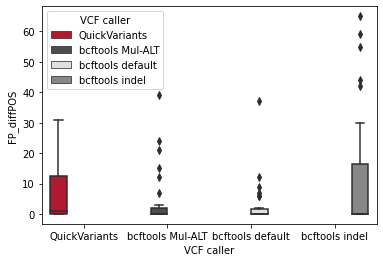

In [132]:
SNPsub = SNP[SNP['total_refSNP']==0]
print('FP',np.quantile(SNPsub.loc[SNPsub['VCF caller']=='QuickVariants','FP_diffPOS'],[0.05,0.5,0.95]),
      np.quantile(SNPsub.loc[SNPsub['VCF caller']!='QuickVariants','FP_diffPOS'],[0.05,0.5,0.95]),
         np.quantile(SNPsub.loc[SNPsub['VCF caller']=='bcftools Mul-ALT','FP_diffPOS'],[0.05,0.5,0.95]),
     np.quantile(SNPsub.loc[SNPsub['VCF caller']=='bcftools indel','FP_diffPOS'],[0.05,0.5,0.95]),
     np.quantile(SNPsub.loc[SNPsub['VCF caller']=='bcftools default','FP_diffPOS'],[0.05,0.5,0.95]))

sns.boxplot(x='VCF caller', y='FP_diffPOS', data=SNPsub,hue = 'VCF caller',palette=pallete_set)

['1e-06' '2e-06' '3e-06' '4e-06' '5e-06' '1e-05' '2e-05' '3e-05' '4e-05'
 '5e-05' '1e-04' '5e-04' '1e-03' '5e-03' '1e-02' '2e-02' '3e-02' '4e-02'
 '5e-02']


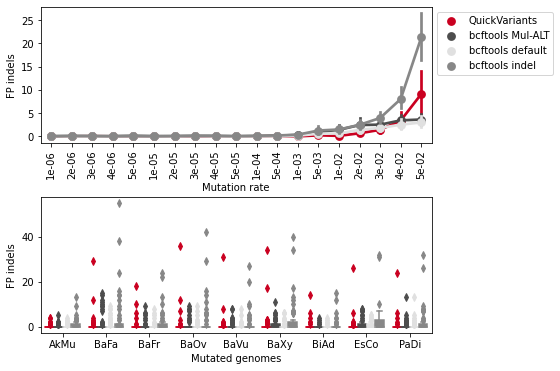

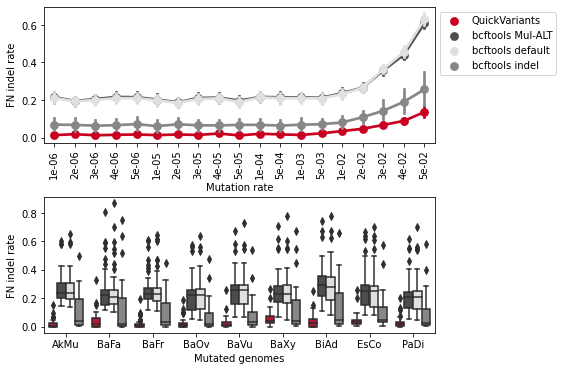

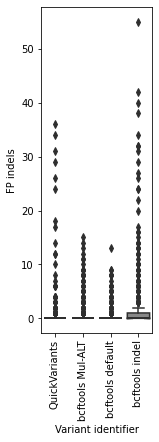

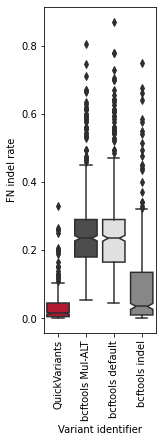

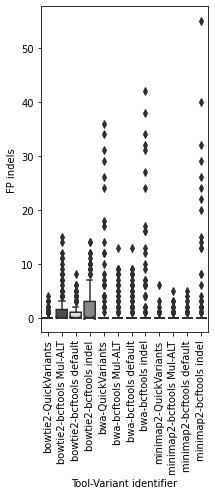

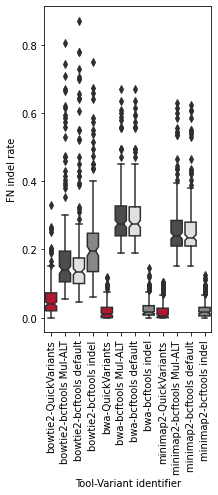

In [134]:
# plot FP sum for mutations and genomes
pallete_set = {
        'QuickVariants':'#ca0020','bcftools Mul-ALT':'#4d4d4d','bcftools default':'#e0e0e0','bcftools indel':'#878787'}

if 'covid' not in folder:
    SNP.index = range(0,SNP.shape[0])
    SNP['FP']=SNP['FP_diffPOS']
    SNP = SNP[SNP['total_refSNP']!=0]
    SNP = SNP.sort_values(['total_refSNP','Genome','Tool','VCF caller'])
    SNP['total_refSNP']=['%.0e'%(x) for x in SNP['total_refSNP']]
    print(SNP['total_refSNP'].unique())
    fig, axs = plt.subplots(nrows=2,ncols = 1,figsize=(7, 6))
    plt.subplots_adjust(hspace=0.4)
    sns.pointplot(x='total_refSNP', y='FP', data=SNP,ax=axs[0],hue = 'VCF caller',palette=pallete_set)
    axs[0].set_xlabel('Mutation rate') 
    axs[0].set_ylabel('FP indels')
    axs[0].get_legend().remove()
    plt.sca(axs[0])
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    sns.boxplot(x='Genome', y='FP', data=SNP,ax=axs[1],hue = 'VCF caller',palette=pallete_set)
    axs[1].set_xlabel('Mutated genomes') 
    axs[1].set_ylabel('FP indels')
    axs[1].get_legend().remove()
    for i, artist in enumerate(axs[1].artists):
        # Hue-level colors are repeated every (number of levels in 'Genome') times.
        # Get the hue level for this box by taking modulo
        hue_level = i % len(pallete_set.keys())
        # Get the color corresponding to this hue level from your custom palette
        color = list(pallete_set.values())[hue_level]
        # Change the outline color
        artist.set_edgecolor(color)
        # Each box has 6 associated Line2D objects (whiskers, fliers, etc.)
        # Update the color for those as well
        for j in range(i * 6, i * 6 + 6):
            line = axs[1].lines[j]
            line.set_color(color)
            line.set_mfc(color)
            line.set_mec(color)
    plt.savefig('%s/Figure 2a.pdf'%(folder))
    # FN sum
    fig, axs = plt.subplots(nrows=2,ncols = 1,figsize=(7, 6))
    plt.subplots_adjust(hspace=0.4)
    sns.pointplot(x='total_refSNP', y='FNrate', data=SNP,ax=axs[0],hue = 'VCF caller',palette=pallete_set)
    axs[0].set_xlabel('Mutation rate') 
    axs[0].set_ylabel('FN indel rate')
    #axs[0].set(yscale="log")
    plt.sca(axs[0])
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    sns.boxplot(x='Genome', y='FNrate', data=SNP,ax=axs[1],hue = 'VCF caller',palette=pallete_set)
    axs[1].set_xlabel('Mutated genomes') 
    axs[1].set_ylabel('FN indel rate')
    #axs[1].set(yscale="log")
    axs[1].get_legend().remove()
    plt.savefig('%s/Figure 2b.pdf'%(folder))
    # plot FN sum for mutations and genomes
    fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(2, 6))
    sns.boxplot(x='VCF caller', y='FP', notch = True, data=SNP,ax=axs,hue = 'VCF caller',dodge=False,palette=pallete_set)
    axs.set_xlabel('Variant identifier') 
    axs.set_ylabel('FP indels')
    axs.get_legend().remove()
    plt.xticks(rotation=90)
    plt.savefig('%s/Figure 2c.pdf'%(folder),bbox_inches='tight')
    # plot FN sum for mutations and genomes
    fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(2, 6))
    sns.boxplot(x='VCF caller', y='FNrate',notch = True,  data=SNP,ax=axs,hue = 'VCF caller',dodge=False,palette=pallete_set)
    axs.set_xlabel('Variant identifier') 
    axs.set_ylabel('FN indel rate')
    axs.get_legend().remove()
    plt.xticks(rotation=90)
    plt.savefig('%s/Figure 2d.pdf'%(folder),bbox_inches='tight')
    SNP = SNP[SNP['total_refSNP']!=0]
    # plot FN sum for mutations and genomes
    fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(3, 6))
    sns.boxplot(x='Tool VCF caller', y='FP', notch = True, data=SNP,ax=axs,hue = 'VCF caller',dodge=False,palette=pallete_set)
    axs.set_xlabel('Tool-Variant identifier') 
    axs.set_ylabel('FP indels')
    axs.get_legend().remove()
    plt.xticks(rotation=90)
    plt.savefig('%s/Figure S2c.pdf'%(folder),bbox_inches='tight')
    # plot FN sum for mutations and genomes
    fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(3, 6))
    sns.boxplot(x='Tool VCF caller', y='FNrate',notch = True,  data=SNP,ax=axs,hue = 'VCF caller',dodge=False,palette=pallete_set)
    axs.set_xlabel('Tool-Variant identifier') 
    axs.set_ylabel('FN indel rate')
    axs.get_legend().remove()
    plt.xticks(rotation=90)
    plt.savefig('%s/Figure S2d.pdf'%(folder),bbox_inches='tight')
    SNP = SNP[SNP['total_refSNP']!=0]
else:
    SNP['sampleshort']=[x.split('.')[0] + '.' + x.split('.SNP')[1].split('.')[0] for x in SNP['Sample']]
    allgenome = SNP['sampleshort'].unique()
    SNP = SNP.sort_values(['total_refSNP','Genome','Tool','VCF caller'])
    fig, axs = plt.subplots(nrows=1,ncols = 2,figsize=(5,2),gridspec_kw={'width_ratios': [1, 2]})
    plt.subplots_adjust(wspace=0.4)
    sns.boxplot(x='VCF caller', y='FP_diffPOS', notch = True, data=SNP,ax=axs[0],hue = 'VCF caller',dodge=False,palette=pallete_set)
    axs[0].set_xlabel('Variant identifier') 
    axs[0].set_ylabel('FP indels')
    axs[0].get_legend().remove()
    sns.pointplot(x='total_refSNP', y='FP_diffPOS', data=SNP,ax=axs[1],hue = 'VCF caller',palette=pallete_set)
    axs[1].set_xlabel('No. mutations') 
    axs[1].set_ylabel('FP indels')
    plt.sca(axs[0])
    plt.xticks(rotation=90)
    plt.sca(axs[1])
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.1, 1.0))
    plt.savefig('%s/Figure 4a.pdf'%(folder),bbox_inches='tight')
    fig, axs = plt.subplots(nrows=1,ncols = 2,figsize=(5,2),gridspec_kw={'width_ratios': [1, 2]})
    plt.subplots_adjust(wspace=0.4)
    sns.boxplot(x='VCF caller', y='FNrate',notch = True,  data=SNP,ax=axs[0],hue = 'VCF caller',dodge=False,palette=pallete_set)
    axs[0].set_xlabel('Variant identifier') 
    axs[0].set_ylabel('FN indel rate')
    axs[0].get_legend().remove()
    sns.pointplot(x='total_refSNP', y='FNrate', data=SNP,ax=axs[1],hue = 'VCF caller',palette=pallete_set)
    axs[1].set_xlabel('No. mutations') 
    axs[1].set_ylabel('FN indel rate')
    plt.sca(axs[0])
    plt.xticks(rotation=90)
    plt.sca(axs[1])
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.1, 1.0))
    plt.savefig('%s/Figure 4b.pdf'%(folder),bbox_inches='tight')
    

In [5]:
# covid
print('FP',np.quantile(SNP.loc[SNP['VCF caller']=='QuickVariants','FP_diffPOS'],[0.05,0.5,0.95]),
         np.quantile(SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FP_diffPOS'],[0.05,0.5,0.95]),
     np.quantile(SNP.loc[SNP['VCF caller']=='bcftools indel','FP_diffPOS'],[0.05,0.5,0.95]),
     np.quantile(SNP.loc[SNP['VCF caller']=='bcftools default','FP_diffPOS'],[0.05,0.5,0.95]))
print('FN',np.quantile(SNP.loc[SNP['VCF caller']=='QuickVariants','FNrate'],[0.05,0.5,0.95])*100,
         np.quantile(SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FNrate'],[0.05,0.5,0.95])*100,
      np.quantile(SNP.loc[SNP['VCF caller']=='bcftools indel','FNrate'],[0.05,0.5,0.95])*100,
     np.quantile(SNP.loc[SNP['VCF caller']=='bcftools default','FNrate'],[0.05,0.5,0.95])*100)
print(kstest(SNP.loc[SNP['VCF caller']=='QuickVariants','FP_diffPOS'],
      SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FP_diffPOS'])
)
print(kstest(SNP.loc[SNP['VCF caller']=='QuickVariants','FP_diffPOS'],
      SNP.loc[SNP['VCF caller']=='bcftools indel','FP_diffPOS'])
)
print(kstest(SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FP_diffPOS'],
      SNP.loc[SNP['VCF caller']=='bcftools indel','FP_diffPOS'])
)

print(kstest(SNP.loc[SNP['VCF caller']=='QuickVariants','FNrate'],
      SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FNrate'])
)
print(kstest(SNP.loc[SNP['VCF caller']=='QuickVariants','FNrate'],
      SNP.loc[SNP['VCF caller']=='bcftools indel','FNrate'])
)

print(kstest(SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FNrate'],
      SNP.loc[SNP['VCF caller']=='bcftools indel','FNrate'])
)

FP [0. 0. 0.] [0. 0. 0.] [0.   0.   1.05] [0. 0. 0.]
FN [ 0.  0. 10.] [15. 35. 50.] [50. 70. 85.] [15. 35. 50.]
KstestResult(statistic=0.008333333333333333, pvalue=1.0)
KstestResult(statistic=0.36666666666666664, pvalue=1.4439886846546988e-07)
KstestResult(statistic=0.35833333333333334, pvalue=3.0755083673165016e-07)
KstestResult(statistic=0.9666666666666667, pvalue=2.9660071147981457e-63)
KstestResult(statistic=1.0, pvalue=2.2001332500149066e-71)
KstestResult(statistic=0.85, pvalue=1.247561257832528e-44)


In [18]:
FP_indel = list(SNP.loc[SNP['VCF caller']=='bcftools indel','FP_diffPOS'])
FP_indel.sort()
print(np.quantile(FP_indel,[0.05,0.5,0.95]),len(FP_indel),len(FP_indel)*0.95,int(len(FP_indel)*0.95))
FP_indel[int(len(FP_indel)*0.95)]

[0.   0.   1.05] 120 114.0 114


2

In [135]:
# MO
print(sum(SNP.loc[SNP['VCF caller']=='bcftools indel','FP'])/
      sum(SNP.loc[SNP['VCF caller']=='QuickVariants','FP']),
      sum(SNP.loc[SNP['VCF caller']=='bcftools indel','FN'])/
      sum(SNP.loc[SNP['VCF caller']=='QuickVariants','FN'])
     )
print(sum(SNP.loc[(SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='QuickVariants'),'FP'])/
      sum(SNP.loc[SNP['VCF caller']=='QuickVariants','FP']),
     sum(SNP.loc[(SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='QuickVariants'),'FN'])/
      sum(SNP.loc[SNP['VCF caller']=='QuickVariants','FN']))
print(sum(SNP.loc[(~SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='bcftools indel'),'FP'])/
      sum(SNP.loc[(~SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='QuickVariants'),'FP']),
      sum(SNP.loc[(~SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='bcftools indel'),'FN'])/
      sum(SNP.loc[(~SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='QuickVariants'),'FN'])
     )
print(np.quantile(SNP.loc[(~SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='QuickVariants'),'FP'],[0.05,0.5,0.95]),
      np.quantile(SNP.loc[(~SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='bcftools indel'),'FP'],[0.05,0.5,0.95]),
     np.quantile(SNP.loc[(~SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='bcftools Mul-ALT'),'FP'],[0.05,0.5,0.95]))
print('FP',
      np.quantile(SNP.loc[SNP['VCF caller']=='QuickVariants','FP'],[0.05,0.5,0.95]),
      np.quantile(SNP.loc[SNP['VCF caller']=='bcftools indel','FP'],[0.05,0.5,0.95]),
         np.quantile(SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FP'],[0.05,0.5,0.95]),
         np.quantile(SNP.loc[SNP['VCF caller']=='bcftools default','FP'],[0.05,0.5,0.95]))
print(np.quantile(SNP.loc[(~SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='QuickVariants'),'FNrate'],[0.05,0.5,0.95])*100,
      np.quantile(SNP.loc[(~SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='bcftools indel'),'FNrate'],[0.05,0.5,0.95])*100,
     np.quantile(SNP.loc[(~SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='bcftools Mul-ALT'),'FNrate'],[0.05,0.5,0.95])*100)
print('FNrate',
      np.quantile(SNP.loc[SNP['VCF caller']=='QuickVariants','FNrate'],[0.05,0.5,0.95])*100,
      np.quantile(SNP.loc[SNP['VCF caller']=='bcftools indel','FNrate'],[0.05,0.5,0.95])*100,
         np.quantile(SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FNrate'],[0.05,0.5,0.95])*100,
         np.quantile(SNP.loc[SNP['VCF caller']=='bcftools default','FNrate'],[0.05,0.5,0.95])*100,
                 np.quantile(SNP.loc[(SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='QuickVariants'),'FNrate'],[0.05,0.5,0.95]),

           np.quantile(SNP.loc[(SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='bcftools Mul-ALT'),'FNrate'],[0.05,0.5,0.95]),
)
print(sum(SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FN'])/
      sum(SNP.loc[SNP['VCF caller']=='bcftools default','FN']))


2.6724137931034484 2.89
0.9261083743842364 0.4915625
6.2 3.7283343577135835
[0. 0. 0.] [0. 0. 3.] [0. 0. 2.]
FP [0. 0. 3.] [ 0.  0. 12.] [0.  0.  5.4] [0. 0. 4.]
[0. 1. 7.] [ 0.   2.5 24. ] [ 9.5 22.  32.5]
FNrate [ 0.   1.5 10.5] [ 0.5  3.5 28.5] [10.  23.5 54.5] [ 9.  23.5 55. ] [0.03 0.08 0.25] [0.295 0.44  0.67 ]
1.004514585584195


In [136]:
# MO
print(sum(SNP.loc[SNP['VCF caller']=='bcftools indel','FP'])/
      sum(SNP.loc[SNP['VCF caller']=='QuickVariants','FP']),
      sum(SNP.loc[SNP['VCF caller']=='bcftools indel','FN'])/
      sum(SNP.loc[SNP['VCF caller']=='QuickVariants','FN'])
     )
print(sum(SNP.loc[(SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='QuickVariants'),'FP'])/
      sum(SNP.loc[SNP['VCF caller']=='QuickVariants','FP']),
     sum(SNP.loc[(SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='QuickVariants'),'FN'])/
      sum(SNP.loc[SNP['VCF caller']=='QuickVariants','FN']))
print(sum(SNP.loc[(~SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='bcftools indel'),'FP'])/
      sum(SNP.loc[(~SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='QuickVariants'),'FP']),
      sum(SNP.loc[(~SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='bcftools indel'),'FN'])/
      sum(SNP.loc[(~SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='QuickVariants'),'FN'])
     )
print(np.quantile(SNP.loc[(~SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='QuickVariants'),'FP'],[0.05,0.5,0.95]),
      np.quantile(SNP.loc[(~SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='bcftools indel'),'FP'],[0.05,0.5,0.95]),
     np.quantile(SNP.loc[(~SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='bcftools Mul-ALT'),'FP'],[0.05,0.5,0.95]))
print('FP',
      np.quantile(SNP.loc[SNP['VCF caller']=='QuickVariants','FP'],[0.05,0.5,0.95]),
      np.quantile(SNP.loc[SNP['VCF caller']=='bcftools indel','FP'],[0.05,0.5,0.95]),
         np.quantile(SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FP'],[0.05,0.5,0.95]),
         np.quantile(SNP.loc[SNP['VCF caller']=='bcftools default','FP'],[0.05,0.5,0.95]))
print(np.quantile(SNP.loc[(~SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='QuickVariants'),'FNrate'],[0.05,0.5,0.95])*100,
      np.quantile(SNP.loc[(~SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='bcftools indel'),'FNrate'],[0.05,0.5,0.95])*100,
     np.quantile(SNP.loc[(~SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='bcftools Mul-ALT'),'FNrate'],[0.05,0.5,0.95])*100)
print('FNrate',
      np.quantile(SNP.loc[SNP['VCF caller']=='QuickVariants','FNrate'],[0.05,0.5,0.95])*100,
      np.quantile(SNP.loc[SNP['VCF caller']=='bcftools indel','FNrate'],[0.05,0.5,0.95])*100,
         np.quantile(SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FNrate'],[0.05,0.5,0.95])*100,
         np.quantile(SNP.loc[SNP['VCF caller']=='bcftools default','FNrate'],[0.05,0.5,0.95])*100,
                 np.quantile(SNP.loc[(SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='QuickVariants'),'FNrate'],[0.05,0.5,0.95]),

           np.quantile(SNP.loc[(SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='bcftools Mul-ALT'),'FNrate'],[0.05,0.5,0.95]),
)
print(sum(SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FN'])/
      sum(SNP.loc[SNP['VCF caller']=='bcftools default','FN']))


2.6724137931034484 2.89
0.9261083743842364 0.4915625
6.2 3.7283343577135835
[0. 0. 0.] [0. 0. 3.] [0. 0. 2.]
FP [0. 0. 3.] [ 0.  0. 12.] [0.  0.  5.4] [0. 0. 4.]
[0. 1. 7.] [ 0.   2.5 24. ] [ 9.5 22.  32.5]
FNrate [ 0.   1.5 10.5] [ 0.5  3.5 28.5] [10.  23.5 54.5] [ 9.  23.5 55. ] [0.03 0.08 0.25] [0.295 0.44  0.67 ]
1.004514585584195


In [137]:
print(np.quantile(SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FNrate'],[
    0.5])/np.quantile(SNP.loc[SNP['VCF caller']=='QuickVariants','FNrate'],[0.5
                                                                   ]),
     np.quantile(SNP.loc[SNP['VCF caller']=='bcftools indel','FNrate'],[
    0.5])/np.quantile(SNP.loc[SNP['VCF caller']=='QuickVariants','FNrate'],[0.5
                                                                   ]))


[15.66666667] [2.33333333]


In [138]:
np.quantile(SNP.loc[SNP['VCF caller']=='bcftools default','FNrate'],[
    0.5])/np.quantile(SNP.loc[SNP['VCF caller']=='QuickVariants','FNrate'],[0.5
                                                                   ])

array([15.66666667])

In [139]:
np.quantile(SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FNrate'],[
    0.5])/np.quantile(SNP.loc[SNP['VCF caller']=='bcftools default','FNrate'],[0.5
                                                                   ])

array([1.])

In [140]:
print(np.quantile(SNP.loc[SNP['VCF caller']=='QuickVariants','FNrate'],[0.05,0.5,0.95]),
         np.quantile(SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FNrate'],[0.05,0.5,0.95]),
     np.quantile(SNP.loc[SNP['VCF caller']=='bcftools indel','FNrate'],[0.05,0.5,0.95]))

[0.    0.015 0.105] [0.1   0.235 0.545] [0.005 0.035 0.285]


In [141]:
print(np.quantile(SNP.loc[(~SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='QuickVariants'),'FNrate'],[0.05,0.5,0.95]),
     np.quantile(SNP.loc[(~SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='QuickVariants'),'FP'],[0.05,0.5,0.95]))


[0.   0.01 0.07] [0. 0. 0.]


In [142]:
np.quantile(SNP.loc[(~SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='bcftools Mul-ALT'),'FNrate'],[0.5])/np.quantile(SNP.loc[
    (~SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='QuickVariants'),'FNrate'],[0.5])


array([22.])

In [143]:
np.quantile(SNP.loc[(~SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='bcftools indel'),'FNrate'],[0.5])/np.quantile(SNP.loc[
    (~SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='QuickVariants'),'FNrate'],[0.5])


array([2.5])

In [144]:
1-sum(SNP.loc[(~SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='QuickVariants'),'FP'])/sum(
SNP.loc[:,'FP'])

0.9862068965517241

In [145]:
print(np.quantile(SNP.loc[(SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='QuickVariants'),'FNrate'],[0.05,0.5,0.95])*100,
 np.quantile(SNP.loc[(SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='bcftools indel'),'FNrate'],[0.05,0.5,0.95])*100,
           np.quantile(SNP.loc[(SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='bcftools Mul-ALT'),'FNrate'],[0.05,0.5,0.95])*100)

[ 3.  8. 25.] [ 4.   9.  58.5] [29.5 44.  67. ]


In [146]:
print(np.quantile(SNP.loc[(SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='QuickVariants'),'FP'],[0.05,0.5,0.95]),
 np.quantile(SNP.loc[(SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='bcftools indel'),'FP'],[0.05,0.5,0.95]),
           np.quantile(SNP.loc[(SNP['total_refSNP'].isin(['3e-02','4e-02','5e-02']))&(SNP['VCF caller']=='bcftools Mul-ALT'),'FP'],[0.05,0.5,0.95]))

[ 0.  1. 26.] [ 0.  7. 34.] [0. 2. 9.]


In [147]:
SNPspecies = pd.DataFrame(SNP.groupby(['Genome','VCF caller'])['FNrate'].median())
SNPspecies.reset_index(inplace=True)
print(kstest(SNPspecies.loc[SNPspecies['VCF caller']=='QuickVariants','FNrate'],
      SNPspecies.loc[SNPspecies['VCF caller']=='bcftools Mul-ALT','FNrate'])
)
for VCFcaller in SNPspecies['VCF caller'].unique():
    SNPspeciessub = SNPspecies[SNPspecies['VCF caller']==VCFcaller]
    print(VCFcaller,np.quantile(SNPspeciessub['FNrate'],[0.05,0.5,0.95])*100,
          np.mean(SNPspeciessub['FNrate'])*100,
          np.std(SNPspeciessub['FNrate']))
    

KstestResult(statistic=1.0, pvalue=4.11353352529823e-05)
QuickVariants [0.7 1.5 3.8] 1.8333333333333337 0.011547005383792514
bcftools Mul-ALT [21.4 23.  27.8] 23.944444444444446 0.022906142364542553
bcftools default [21.  23.  27.2] 23.61111111111111 0.022082896571501996
bcftools indel [1.7 3.  4.5] 3.2222222222222228 0.01030402055055078


<AxesSubplot:xlabel='VCF caller', ylabel='FNrate'>

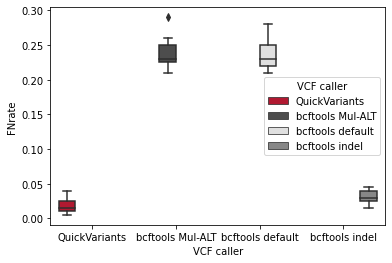

In [148]:
sns.boxplot(x='VCF caller', y='FNrate',  data=SNPspecies,hue = 'VCF caller',palette=pallete_set)


In [149]:
from scipy.stats import kstest
print(kstest(SNP.loc[(SNP['Tool']=='bowtie2') & (SNP['VCF caller']=='bcftools indel'),'FP'],
      SNP.loc[(SNP['Tool']!='bowtie2') & (SNP['VCF caller']=='bcftools indel'),'FP'])
)
print(kstest(SNP.loc[(SNP['Tool']=='bwa') & (SNP['VCF caller']=='bcftools indel'),'FP'],
      SNP.loc[(SNP['Tool']=='minimap2') & (SNP['VCF caller']=='bcftools indel'),'FP'])
)
print(kstest(SNP.loc[(SNP['Tool']=='bowtie2') & (SNP['VCF caller']=='bcftools Mul-ALT'),'FP'],
      SNP.loc[(SNP['Tool']!='bowtie2') & (SNP['VCF caller']=='bcftools Mul-ALT'),'FP'])
)
print(kstest(SNP.loc[(SNP['Tool']=='bwa') & (SNP['VCF caller']=='bcftools Mul-ALT'),'FP'],
      SNP.loc[(SNP['Tool']=='minimap2') & (SNP['VCF caller']=='bcftools Mul-ALT'),'FP'])
)
from scipy.stats import kstest
print(kstest(SNP.loc[(SNP['Tool']=='bowtie2') & (SNP['VCF caller']=='QuickVariants'),'FP'],
      SNP.loc[(SNP['Tool']!='bowtie2') & (SNP['VCF caller']=='QuickVariants'),'FP'])
)
print(kstest(SNP.loc[(SNP['Tool']=='bwa') & (SNP['VCF caller']=='QuickVariants'),'FP'],
      SNP.loc[(SNP['Tool']=='minimap2') & (SNP['VCF caller']=='QuickVariants'),'FP'])
)


KstestResult(statistic=0.24853801169590642, pvalue=1.2789765461151958e-06)
KstestResult(statistic=0.05847953216374269, pvalue=0.932944329455469)
KstestResult(statistic=0.20760233918128654, pvalue=9.779231367201824e-05)
KstestResult(statistic=0.11695906432748537, pvalue=0.1929417747878115)
KstestResult(statistic=0.0935672514619883, pvalue=0.26587297445077773)
KstestResult(statistic=0.14619883040935672, pvalue=0.05160227820703253)


In [150]:
from scipy.stats import kstest
print(kstest(SNP.loc[(SNP['Tool']=='bowtie2') & (SNP['VCF caller']=='bcftools indel'),'FNrate'],
      SNP.loc[(SNP['Tool']!='bowtie2') & (SNP['VCF caller']=='bcftools indel'),'FNrate'])
)
print(kstest(SNP.loc[(SNP['Tool']=='bwa') & (SNP['VCF caller']=='bcftools indel'),'FNrate'],
      SNP.loc[(SNP['Tool']=='minimap2') & (SNP['VCF caller']=='bcftools indel'),'FNrate'])
)
print(kstest(SNP.loc[(SNP['Tool']=='bowtie2') & (SNP['VCF caller']=='bcftools Mul-ALT'),'FNrate'],
      SNP.loc[(SNP['Tool']!='bowtie2') & (SNP['VCF caller']=='bcftools Mul-ALT'),'FNrate'])
)
print(kstest(SNP.loc[(SNP['Tool']=='bwa') & (SNP['VCF caller']=='bcftools Mul-ALT'),'FNrate'],
      SNP.loc[(SNP['Tool']=='minimap2') & (SNP['VCF caller']=='bcftools Mul-ALT'),'FNrate'])
)
from scipy.stats import kstest
print(kstest(SNP.loc[(SNP['Tool']=='bowtie2') & (SNP['VCF caller']=='QuickVariants'),'FNrate'],
      SNP.loc[(SNP['Tool']!='bowtie2') & (SNP['VCF caller']=='QuickVariants'),'FNrate'])
)
print(kstest(SNP.loc[(SNP['Tool']=='bwa') & (SNP['VCF caller']=='QuickVariants'),'FNrate'],
      SNP.loc[(SNP['Tool']=='minimap2') & (SNP['VCF caller']=='QuickVariants'),'FNrate'])
)

KstestResult(statistic=0.9327485380116959, pvalue=1.1102230246251565e-15)
KstestResult(statistic=0.04093567251461988, pvalue=0.9988781909888858)
KstestResult(statistic=0.6695906432748538, pvalue=1.1102230246251565e-15)
KstestResult(statistic=0.2631578947368421, pvalue=1.2958456767406234e-05)
KstestResult(statistic=0.4649122807017544, pvalue=1.1102230246251565e-15)
KstestResult(statistic=0.05263157894736842, pvalue=0.9725604546148136)


In [151]:
# MO
print(kstest(SNP.loc[SNP['VCF caller']=='QuickVariants','FP'],
      SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FP'])
)
print(kstest(SNP.loc[SNP['VCF caller']=='QuickVariants','FNrate'],
      SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FNrate'])
)
print(kstest(SNP.loc[SNP['VCF caller']=='QuickVariants','FP'],
      SNP.loc[SNP['VCF caller']=='bcftools indel','FP'])
)
print(kstest(SNP.loc[SNP['VCF caller']=='QuickVariants','FNrate'],
      SNP.loc[SNP['VCF caller']=='bcftools indel','FNrate'])
)
print(kstest(SNP.loc[SNP['VCF caller']=='bcftools default','FP'],
      SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FP'])
)
print(kstest(SNP.loc[SNP['VCF caller']=='bcftools default','FNrate'],
      SNP.loc[SNP['VCF caller']=='bcftools Mul-ALT','FNrate'])
)
print(kstest(SNP.loc[SNP['VCF caller']=='QuickVariants','FP'],
      SNP.loc[SNP['VCF caller']=='bcftools default','FP'])
)
print(kstest(SNP.loc[SNP['VCF caller']=='QuickVariants','FNrate'],
      SNP.loc[SNP['VCF caller']=='bcftools default','FNrate'])
)

KstestResult(statistic=0.056530214424951264, pvalue=0.3856671687327428)
KstestResult(statistic=0.8947368421052632, pvalue=4.6783755045092725e-217)
KstestResult(statistic=0.13060428849902533, pvalue=0.00031159956214030584)
KstestResult(statistic=0.2807017543859649, pvalue=3.357987814261973e-18)
KstestResult(statistic=0.031189083820662766, pvalue=0.964531085949616)
KstestResult(statistic=0.03508771929824561, pvalue=0.910736723166579)
KstestResult(statistic=0.02729044834307992, pvalue=0.9911275456215753)
KstestResult(statistic=0.8771929824561403, pvalue=4.064812210531008e-206)


In [26]:
# Time
folder = 'samtovcf/new/15thread/'
pallete_set = {
        'QuickVariants':'#ca0020','bcftools':'#878787'}

Time=pd.read_csv('%s/alltimesum.txt'%(folder), sep='\t')

Time['Genome']=[x.split('.')[0] for x in Time['fasta']]

genome_set = {'am_BA_g0003':'BiAd',
                 'am_BaFr_g0050':'BaFr',
                 'am_BaSa_g0015':'BaSa',
             'am_AkMu_g0002':'AkMu','am_BaOv_g0001':'BaOv',
              'am_BaVu_g0002':'BaVu','am_EsCo_g0005':'EsCo',
             'am_PaDi_g0001':'PaDi','SRR2842672':'human',
             'aa_BaFa_g0001':'BaFa-aa','bf_BaFa_g0001':'BaFa',
              'bj_EsCo_g0001':'EsCo','cx_BaXy_g0001':'BaXy','SRR10971381':'SARS-COV-2'}
Time['Genome'] = [genome_set[x] for x in Time['Genome']]
allgenome = Time['Genome'].unique()
Time['Tool'] = Time['tool']
print(Time['Tool'].unique())
Time['VCF caller']=[x.replace('VARIANTS','QuickVariants').replace('(',
                                                                  '').replace(')',
                                                                  '') for x in Time['VCF caller']]
Time = Time.sort_values(['Genome','Tool','VCF caller','SNP'])
print(Time['Tool'].unique(),Time['VCF caller'].unique())
print(allgenome)
Time['Tool VCF caller'] = Time['Tool'] + '-' + Time['VCF caller']
Time['SNP']=['%.0e'%(x) for x in Time['SNP']]
Time=Time[Time['VCF caller'].isin(['QuickVariants','bcftools'])]
Time.head()


['bowtie2' 'minimap2' 'bwa']
['bowtie2' 'bwa' 'minimap2'] ['QuickVariants' 'QuickVariants total' 'bcftools' 'bcftools total']
['BaXy' 'EsCo' 'AkMu' 'BaFr' 'PaDi' 'BaVu' 'BaFa' 'BiAd' 'BaOv']


fasta    SNP     tool     VCF caller  Total time Genome  \
781   am_AkMu_g0002  1e-06  bowtie2  QuickVariants        6.47   AkMu   
337   am_AkMu_g0002  2e-06  bowtie2  QuickVariants        6.49   AkMu   
613   am_AkMu_g0002  3e-06  bowtie2  QuickVariants        6.68   AkMu   
1681  am_AkMu_g0002  4e-06  bowtie2  QuickVariants        6.23   AkMu   
25    am_AkMu_g0002  5e-06  bowtie2  QuickVariants        6.46   AkMu   

         Tool        Tool VCF caller  
781   bowtie2  bowtie2-QuickVariants  
337   bowtie2  bowtie2-QuickVariants  
613   bowtie2  bowtie2-QuickVariants  
1681  bowtie2  bowtie2-QuickVariants  
25    bowtie2  bowtie2-QuickVariants

In [27]:
# samfile size
filesize = pd.read_csv('%s/../samsize.txt'%(folder),sep='\t',header=None)
filesize.columns=['sam size','file']
filesize['file']=[x.replace('.fasta','').replace('.SNP','').replace('.corrected','').replace('.sam','').replace('minimap','minimap2').replace('bowtie','bowtie2') for x in filesize['file']]
Time['file']=Time['fasta'] + '.' + [str(x) for x in Time['SNP']] + '.' + Time['Tool']
Time2=Time[Time['SNP']!='0e+00']
Time2 = Time2.merge(filesize,left_on = 'file',right_on = 'file',how='left')
Time2['sam size'] = [int(x)/1e6 for x in Time2['sam size']]
Time2.head()


fasta    SNP     tool     VCF caller  Total time Genome     Tool  \
0  am_AkMu_g0002  1e-06  bowtie2  QuickVariants        6.47   AkMu  bowtie2   
1  am_AkMu_g0002  2e-06  bowtie2  QuickVariants        6.49   AkMu  bowtie2   
2  am_AkMu_g0002  3e-06  bowtie2  QuickVariants        6.68   AkMu  bowtie2   
3  am_AkMu_g0002  4e-06  bowtie2  QuickVariants        6.23   AkMu  bowtie2   
4  am_AkMu_g0002  5e-06  bowtie2  QuickVariants        6.46   AkMu  bowtie2   

         Tool VCF caller                         file     sam size  
0  bowtie2-QuickVariants  am_AkMu_g0002.1e-06.bowtie2  2827.039285  
1  bowtie2-QuickVariants  am_AkMu_g0002.2e-06.bowtie2  2827.070182  
2  bowtie2-QuickVariants  am_AkMu_g0002.3e-06.bowtie2  2827.009534  
3  bowtie2-QuickVariants  am_AkMu_g0002.4e-06.bowtie2  2827.028066  
4  bowtie2-QuickVariants  am_AkMu_g0002.5e-06.bowtie2  2827.060077

In [38]:
grouped = Time.groupby(['Genome', 'VCF caller'])['Total time'].median().reset_index()
std_devs = grouped.groupby('VCF caller')['Total time'].std().reset_index()
means = grouped.groupby('VCF caller')['Total time'].mean().reset_index()
std_devs['RSD (%)'] = (std_devs['Total time'] / means['Total time']) * 100
std_devs

VCF caller  Total time    RSD (%)
0  QuickVariants    2.189226  38.280620
1       bcftools   31.258027  60.352744

In [39]:
grouped = Time.groupby(['SNP', 'VCF caller'])['Total time'].median().reset_index()
std_devs = grouped.groupby('VCF caller')['Total time'].std().reset_index()
means = grouped.groupby('VCF caller')['Total time'].mean().reset_index()
std_devs['RSD (%)'] = (std_devs['Total time'] / means['Total time']) * 100
std_devs

VCF caller  Total time   RSD (%)
0  QuickVariants    0.113717  2.008202
1       bcftools    0.799191  1.535073

In [44]:
Time2['sam size short']=[int(x/100) for x in Time2['sam size']]
grouped = Time2.groupby(['sam size short', 'VCF caller'])['Total time'].median().reset_index()
grouped['sam size']=[int(x/100) for x in grouped['sam size']]
std_devs = grouped.groupby('VCF caller')['Total time'].std().reset_index()
means = grouped.groupby('VCF caller')['Total time'].mean().reset_index()
std_devs['RSD (%)'] = (std_devs['Total time'] / means['Total time']) * 100
grouped

VCF caller  Total time    RSD (%)
0  QuickVariants    2.495530  38.759065
1       bcftools   36.827137  59.119131

In [52]:
np.quantile(Time2.loc[(Time2['sam size']>=800)&(
Time2['sam size']<=1500)&(Time2['VCF caller']=='bcftools'),'Total time'],[0.5])

array([21.5])

In [53]:
np.quantile(Time2.loc[(Time2['sam size']>=2000)&(
Time2['sam size']<=3000)&(Time2['VCF caller']=='bcftools'),'Total time'],[0.5])

array([55.57])

In [54]:
np.quantile(Time2.loc[(Time2['sam size']>=4000)&(Time2['VCF caller']=='bcftools'),'Total time'],[0.5])

array([120.35])

In [4]:
np.quantile(Time2.loc[(Time2['sam size']>=800)&(
Time2['sam size']<=1500)&(Time2['VCF caller']=='QuickVariants'),'Total time'],[0.5])

array([3.205])

In [5]:
np.quantile(Time2.loc[(Time2['sam size']>=2000)&(
Time2['sam size']<=3000)&(Time2['VCF caller']=='QuickVariants'),'Total time'],[0.5])

array([5.88])

In [6]:
np.quantile(Time2.loc[(Time2['sam size']>=4000)&(Time2['VCF caller']=='QuickVariants'),'Total time'],[0.5])

array([10.43])

In [28]:
120.35/21.5

5.597674418604651

In [29]:
10.43/3.205

3.254290171606864

In [49]:
# Group by 'VCF caller' and calculate slope for each group
grouped = Time2.groupby('VCF caller')
slopes = {}

for name, group in grouped:
    x = group['sam size']
    y = group['Total time']
    slope, intercept = np.polyfit(x, y, 1)
    slopes[name] = slope
    print(f"The slope for {name} is {slope}")

plt.show()

The slope for QuickVariants is 0.001997844612902316
The slope for bcftools is 0.028761054029586036


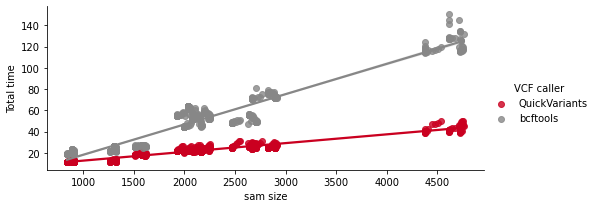

In [4]:
sns.lmplot(x='sam size', y='Total time', data=Time2,
            hue = 'VCF caller',palette=pallete_set,height=3, aspect=7/3)
plt.savefig('%s/Figure Sam.pdf'%(folder))


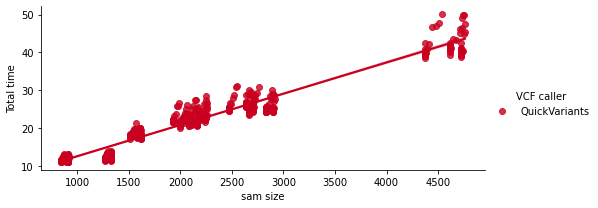

In [5]:
sns.lmplot(x='sam size', y='Total time', data=Time2[Time2['VCF caller']=='QuickVariants'],
            hue = 'VCF caller',palette=pallete_set,height=3, aspect=7/3)


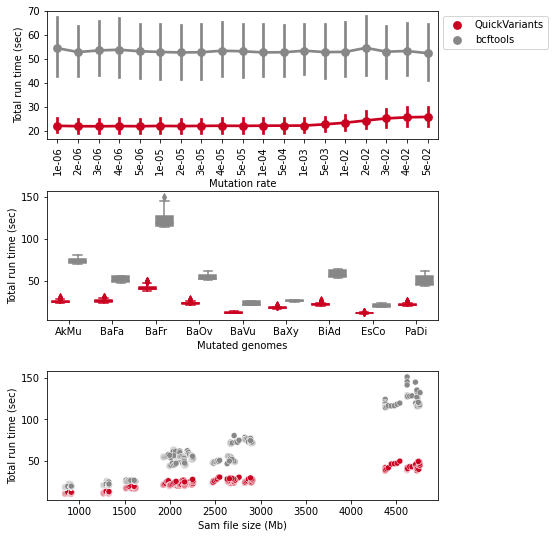

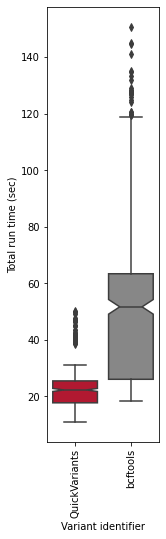

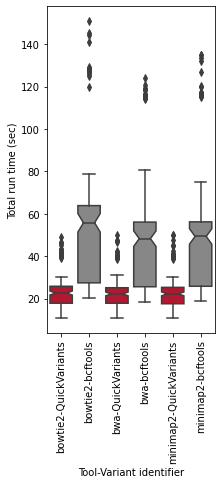

In [20]:
fig, axs = plt.subplots(nrows=3,ncols = 1,figsize=(7, 9))
plt.subplots_adjust(hspace=0.4)
sns.pointplot(x='SNP', y='Total time', data=Time,ax=axs[0],hue = 'VCF caller',palette=pallete_set)
axs[0].set_xlabel('Mutation rate') 
axs[0].set_ylabel('Total run time (sec)')
axs[0].get_legend().remove()
plt.sca(axs[0])
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.0, 1.0))

sns.boxplot(x='Genome', y='Total time', data=Time,ax=axs[1],hue = 'VCF caller',palette=pallete_set)
axs[1].set_xlabel('Mutated genomes') 
axs[1].set_ylabel('Total run time (sec)')
axs[1].get_legend().remove()
for i, artist in enumerate(axs[1].artists):
        # Hue-level colors are repeated every (number of levels in 'Genome') times.
        # Get the hue level for this box by taking modulo
        hue_level = i % len(pallete_set.keys())
        # Get the color corresponding to this hue level from your custom palette
        color = list(pallete_set.values())[hue_level]
        # Change the outline color
        artist.set_edgecolor(color)
        # Each box has 6 associated Line2D objects (whiskers, fliers, etc.)
        # Update the color for those as well
        for j in range(i * 6, i * 6 + 6):
            line = axs[1].lines[j]
            line.set_color(color)
            line.set_mfc(color)
            line.set_mec(color)
sns.scatterplot(x='sam size', y='Total time', data=Time2,
            ax=axs[2],hue = 'VCF caller',palette=pallete_set)
axs[2].set_xlabel('Sam file size (Mb)') 
axs[2].set_ylabel('Total run time (sec)')
axs[2].get_legend().remove()
plt.savefig('%s/Figure 1a.pdf'%(folder))

fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(2, 8))
sns.boxplot(x='VCF caller', y='Total time',notch = True,  data=Time,ax=axs,hue = 'VCF caller',dodge=False,palette=pallete_set)
axs.set_xlabel('Variant identifier') 
axs.set_ylabel('Total run time (sec)')
axs.get_legend().remove()
plt.xticks(rotation=90)
plt.savefig('%s/Figure 1b.pdf'%(folder),bbox_inches='tight')

fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(3, 6))
sns.boxplot(x='Tool VCF caller', y='Total time', notch = True, data=Time,ax=axs,hue = 'VCF caller',dodge=False,palette = pallete_set)
axs.set_xlabel('Tool-Variant identifier') 
axs.set_ylabel('Total run time (sec)')
plt.xticks(rotation=90)
axs.get_legend().remove()
plt.savefig('%s/Figure S4.pdf'%(folder),bbox_inches='tight')


<AxesSubplot:xlabel='Total time', ylabel='Count'>

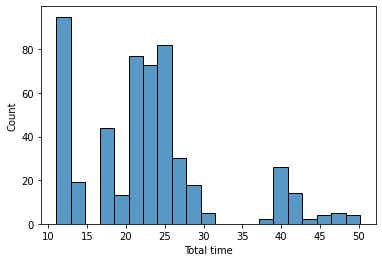

In [8]:
sns.histplot(data = Time[Time['VCF caller']=='QuickVariants'],x = 'Total time')

<AxesSubplot:xlabel='Total time', ylabel='Count'>

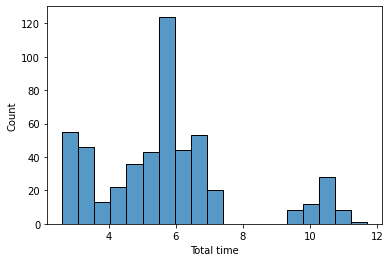

In [12]:
sns.histplot(data = Time[Time['VCF caller']=='QuickVariants'],x = 'Total time')

In [27]:
#15 thread
print('Time',np.quantile(Time.loc[Time['VCF caller']=='QuickVariants','Total time'],[0.05,0.5,0.95]),
 np.quantile(Time.loc[Time['VCF caller']=='bcftools','Total time'],[0.05,0.5,0.95]),
     
     )
print(np.quantile(Time.loc[Time['VCF caller']=='bcftools','Total time'],[0.5])/
     np.quantile(Time.loc[Time['VCF caller']=='QuickVariants','Total time'],[0.5]))

Time [ 2.866  5.66  10.46 ] [ 19.378  52.03  122.37 ]
[9.19257951]


In [28]:
# 15 thread
print(kstest(Time.loc[Time['VCF caller']=='QuickVariants','Total time'],
      Time.loc[Time['VCF caller']=='bcftools','Total time'])
)


KstestResult(statistic=1.0, pvalue=1.116847523521345e-307)


In [9]:
#1 thread
print('Time',np.quantile(Time.loc[Time['VCF caller']=='QuickVariants','Total time'],[0.05,0.5,0.95]),
 np.quantile(Time.loc[Time['VCF caller']=='bcftools','Total time'],[0.05,0.5,0.95]),
     
     )
print(np.quantile(Time.loc[Time['VCF caller']=='bcftools','Total time'],[0.5])/
     np.quantile(Time.loc[Time['VCF caller']=='QuickVariants','Total time'],[0.5]))

Time [11.466 22.29  41.006] [ 19.444  51.68  120.066]
[2.31852849]


In [10]:
# 1 thread
print(kstest(Time.loc[Time['VCF caller']=='QuickVariants','Total time'],
      Time.loc[Time['VCF caller']=='bcftools','Total time'])
)

KstestResult(statistic=0.6413255360623782, pvalue=1.4359521046707863e-99)


In [170]:
#30 thread
print('Time',np.quantile(Time.loc[Time['VCF caller']=='VARIANTS','Total time'],[0.05,0.5,0.95]),
 np.quantile(Time.loc[Time['VCF caller']=='bcftools','Total time'],[0.05,0.5,0.95]),
     
     )
print(np.quantile(Time.loc[Time['VCF caller']=='bcftools','Total time'],[0.5])/
     np.quantile(Time.loc[Time['VCF caller']=='VARIANTS','Total time'],[0.5]))

Time [ 5.28 10.42 17.9 ] [ 19.31  51.44 126.82]
[4.93666027]


In [458]:
#30 thread
print('Time',np.quantile(Time.loc[Time['VCF caller']=='VARIANTS','Total time'],[0.05,0.5,0.95]),
 np.quantile(Time.loc[Time['VCF caller']=='bcftools','Total time'],[0.05,0.5,0.95]),
     
     )

print(np.quantile(Time.loc[Time['VCF caller']=='bcftools','Total time'],[0.5])/
     np.quantile(Time.loc[Time['VCF caller']=='VARIANTS','Total time'],[0.5]))

Time [ 3.74   7.86  13.783] [ 5.388 11.585 22.07 ] [ 20.0395  53.215  123.153 ] [ 21.839   57.47   131.7845]
7.110038884252765 6.577539905186333
[6.77035623] [4.96072508] [0.92596137] [0.67846353]


In [160]:
# 30 thread
print(kstest(Time.loc[Time['VCF caller']=='VARIANTS','Total time'],
      Time.loc[Time['VCF caller']=='bcftools','Total time'])
)


KstestResult(statistic=0.9629629629629629, pvalue=1.2643802290367717e-267)


In [167]:
### indel example
from Bio import SeqIO
allalignment = []
readID_in = []
for record in SeqIO.parse('samtovcf/indelsvcfervsbcftools/examplereads.aligned.fasta', 'fasta'):
    readID = str(record.id)
    readseq = str(record.seq)
    if '_' not in readID:
        if 'ref' in readID or int(readID)%2 == 0:
            allalignment.append('>%s\n%s\n'%(readID,readseq))
            readID_in.append(readID)
    elif readID.split('_')[0] in['50','104','16','180','2','208','86']:
        allalignment.append('>%s\n%s\n'%(readID,readseq))
        readID_in.append(readID.split('_')[0])
f1 = open('samtovcf/indelsvcfervsbcftools/examplereads.alignedshort.fasta','w')
f1.write(''.join(allalignment))
f1.close()


In [199]:
examplemapping = pd.read_csv('samtovcf/indelsvcfervsbcftools/examplereads.mapping.txt',sep='\t')
examplemappingall = examplemapping.loc[:,['readID','VCFer']]
examplemappingall['Tool']='VARIANTS'
examplemappingall['Value'] = [str(x).replace('True','Reported').replace('False','Unreported') for x in examplemappingall['VCFer']]
examplemappingall = examplemappingall.loc[:,['readID','Tool','Value']]

examplemappingsub = examplemapping.loc[:,['readID','bcftools (multi-alleles)']]
examplemappingsub['Tool']='bcftools mul-ALT'
examplemappingsub['Value'] = [str(x).replace('True','Reported').replace('False','Unreported') for x in examplemappingsub['bcftools (multi-alleles)']]
examplemappingsub = examplemappingsub.loc[:,['readID','Tool','Value']]
examplemappingall = examplemappingall.append(examplemappingsub)

examplemappingsub = examplemapping.loc[:,['readID','bcftools (default)']]
examplemappingsub['Tool']='bcftools default'
examplemappingsub['Value'] = [str(x).replace('True','Reported').replace('False','Unreported') for x in examplemappingsub['bcftools (default)']]
examplemappingsub = examplemappingsub.loc[:,['readID','Tool','Value']]
examplemappingall = examplemappingall.append(examplemappingsub)

examplemappingsub = examplemapping.loc[:,['readID','bcftools (indels)']]
examplemappingsub['Tool']='bcftools indel'
examplemappingsub['Value'] = [str(x).replace('True','Reported').replace('False','Unreported') for x in examplemappingsub['bcftools (indels)']]
examplemappingsub = examplemappingsub.loc[:,['readID','Tool','Value']]
examplemappingall = examplemappingall.append(examplemappingsub)

examplemappingall = examplemappingall.sort_values('readID',ascending=False)
examplesum = pd.DataFrame(examplemappingall.groupby(['Tool','Value'])['Value'].count()
)
examplesum.columns=['No. reads']
examplesum.reset_index(inplace = True)
examplesum['No. reads corrected'] = examplesum['No. reads']
examplesum.loc[examplesum['Value']=='Unreported','No. reads corrected']=176
examplesum = examplesum.sort_values('Value',ascending=False)
examplesum

Tool       Value  No. reads  No. reads corrected
1  bcftools default  Unreported        176                  176
3   bcftools indels  Unreported        142                  176
5  bcftools mul-ALT  Unreported        142                  176
0             VCFer    Reported        176                  176
2   bcftools indels    Reported         34                   34
4  bcftools mul-ALT    Reported         34                   34

In [200]:
pd.DataFrame(examplemapping.groupby(['VARIANTS','bcftools mul-ALT','bcftools default','bcftools indel'])['VCFer'].count()
)

VCFer
VCFer bcftools (multi-alleles) bcftools (default) bcftools (indels)       
True  False                    False              False                141
                                                  True                   1
      True                     False              False                  1
                                                  True                  33

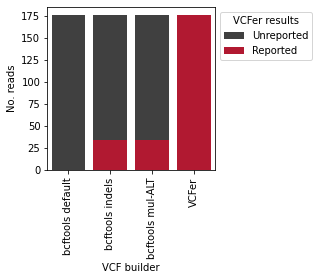

In [148]:
fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(3, 3))
sns.barplot(data = examplesum,
                y='No. reads corrected',x='Tool',hue = 'Value',dodge = False, ax=axs,
           palette={
'Reported':'#ca0020','Unreported':'#404040','Incorrectly reported':'#0571b0'})

axs.set_ylabel('No. reads') 
axs.set_xlabel('VCF builder')
plt.legend(bbox_to_anchor=(1.0, 1.0),title='VCFer results')  
plt.xticks(rotation=90)
plt.savefig('samtovcf/indelsvcfervsbcftools/Example.pdf')


In [175]:
examplemapping = pd.read_csv('samtovcf/indelsvcfervsbcftools/examplereads.mapping.txt',sep='\t')
examplemapping = examplemapping[examplemapping['readID'].isin(readID_in + ['all'])]
examplemapping = examplemapping.sort_values('readID',ascending=False)
examplemapping = examplemapping[~examplemapping['readID'].str.contains('_')]
examplemappingsub = examplemapping[examplemapping['readID'].isin(
    ['50','104','16',  '108',                                        
     '180','2','208','86'])]
examplemapping = examplemapping[~examplemapping['readID'].isin(
    ['50','104','108','130','134','140','16','164',
                                                                  
     '180','198','2','202','208','46','50','52','86','88'])]

examplemappingsub['readID'] = examplemappingsub['readID'] + '_' + '1'
examplemapping = examplemapping.append(examplemappingsub)
examplemappingsub['readID'] = [x.replace('_1','_2') for x in examplemappingsub['readID']]
examplemapping = examplemapping.append(examplemappingsub)
examplemapping.head()

readID  VCFer  bcftools (multi-alleles)  bcftools (default)  \
174    all   True                     False               False   
172     98   True                     False               False   
170     96   True                     False               False   
168     94   True                     False               False   
166     92   True                     False               False   

     bcftools (indels)  
174              False  
172              False  
170              False  
168              False  
166              False

In [178]:
pd.DataFrame(examplemapping.groupby(['VARIANTS','bcftools mul-ALT','bcftools default','bcftools indel'])['VCFer'].count()
)

VCFer
VCFer bcftools (multi-alleles) bcftools (default) bcftools (indels)       
True  False                    False              False                 73
                                                  True                   2
      True                     False              False                  2
                                                  True                   8

In [179]:
examplemappingall = examplemapping.loc[:,['readID','VCFer']]
examplemappingall['Tool']='VAIRNATS'
examplemappingall['Value'] = [str(x).replace('True','Reported').replace('False','Unreported') for x in examplemappingall['VCFer']]
examplemappingall = examplemappingall.loc[:,['readID','Tool','Value']]

examplemappingsub = examplemapping.loc[:,['readID','bcftools (multi-alleles)']]
examplemappingsub['Tool']='bcftools mul-ALT'
examplemappingsub['Value'] = [str(x).replace('True','Reported').replace('False','Unreported') for x in examplemappingsub['bcftools (multi-alleles)']]
examplemappingsub = examplemappingsub.loc[:,['readID','Tool','Value']]
examplemappingall = examplemappingall.append(examplemappingsub)

examplemappingsub = examplemapping.loc[:,['readID','bcftools (default)']]
examplemappingsub['Tool']='bcftools default'
examplemappingsub['Value'] = [str(x).replace('True','Reported').replace('False','Unreported') for x in examplemappingsub['bcftools (default)']]
examplemappingsub = examplemappingsub.loc[:,['readID','Tool','Value']]
examplemappingall = examplemappingall.append(examplemappingsub)

examplemappingsub = examplemapping.loc[:,['readID','bcftools (indels)']]
examplemappingsub['Tool']='bcftools indel'
examplemappingsub['Value'] = [str(x).replace('True','Reported').replace('False','Unreported') for x in examplemappingsub['bcftools (indels)']]
examplemappingsub = examplemappingsub.loc[:,['readID','Tool','Value']]
examplemappingall = examplemappingall.append(examplemappingsub)

examplemappingall = examplemappingall.sort_values('readID',ascending=True)
examplemappingall.tail()


readID              Tool       Value
172     98             VCFer    Reported
174    all  bcftools default  Unreported
174    all  bcftools mul-ALT  Unreported
174    all   bcftools indels  Unreported
174    all             VCFer    Reported

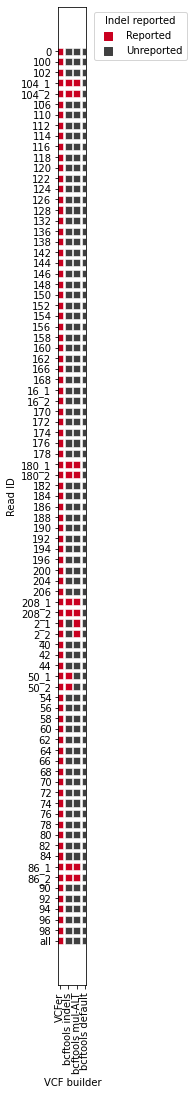

In [184]:
fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(0.5, 18))
sns.scatterplot(x='Tool', y='readID', hue = 'Value',data=examplemappingall,ax = axs,
               palette={'Reported':'#ca0020','Unreported':'#404040','Incorrectly reported':'#0571b0'},
                style='Value', markers={'Reported':'s','Unreported': 's', 'Incorrectly reported': 's'},
                size = 'Value',sizes={'Reported':50,'Unreported': 50, 'Incorrectly reported': 50})
axs.set_xlabel('VCF builder') 
axs.set_ylabel('Read ID')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.1, 1.0),title = 'Indel reported')
plt.savefig('samtovcf/indelsvcfervsbcftools/readID.pdf')


In [182]:
examplemappingall3 = examplemappingall[examplemappingall['readID']!='all']
pd.DataFrame(examplemappingall3.groupby(['Tool','Value'])['Value'].count())

Value
Tool             Value            
VCFer            Reported       84
bcftools default Unreported     84
bcftools indels  Reported       10
                 Unreported     74
bcftools mul-ALT Reported       10
                 Unreported     74

In [299]:
# compare to read dis to insertion
from Bio import SeqIO
allalignment = {}
allpairedread = []
for record in SeqIO.parse('samtovcf/indelsvcfervsbcftools/examplereads.aligned.fasta', 'fasta'):
    allalignment.setdefault(str(record.id),str(record.seq))
    if '_' in str(record.id):
        allpairedread.append(str(record.id).split('_')[0])


In [300]:
examplemapping = pd.read_csv('samtovcf/indelsvcfervsbcftools/examplereads.mapping.txt',sep='\t')
examplemapping = examplemapping[~examplemapping['readID'].isin(['all','allsub'])]
examplemappingsub = examplemapping[examplemapping['readID'].isin(
    allpairedread)]
examplemapping = examplemapping[~examplemapping['readID'].isin(
    allpairedread)]

examplemappingsub['readID'] = examplemappingsub['readID'] + '_' + '1'
examplemapping = examplemapping.append(examplemappingsub)
examplemappingsub['readID'] = [x.replace('_1','_2') for x in examplemappingsub['readID']]
examplemapping = examplemapping.append(examplemappingsub)
examplemappingall = examplemapping.loc[:,['readID','VCFer']]
examplemappingall['Tool']='VARIANTS'
examplemappingall['Value'] = [str(x).replace('True','Reported').replace('False','Unreported') for x in examplemappingall['VCFer']]
examplemappingall = examplemappingall.loc[:,['readID','Tool','Value']]

examplemappingsub = examplemapping.loc[:,['readID','bcftools (multi-alleles)']]
examplemappingsub['Tool']='bcftools mul-ALT'
examplemappingsub['Value'] = [str(x).replace('True','Reported').replace('False','Unreported') for x in examplemappingsub['bcftools (multi-alleles)']]
examplemappingsub = examplemappingsub.loc[:,['readID','Tool','Value']]
examplemappingall = examplemappingall.append(examplemappingsub)

examplemappingsub = examplemapping.loc[:,['readID','bcftools (default)']]
examplemappingsub['Tool']='bcftools default'
examplemappingsub['Value'] = [str(x).replace('True','Reported').replace('False','Unreported') for x in examplemappingsub['bcftools (default)']]
examplemappingsub = examplemappingsub.loc[:,['readID','Tool','Value']]
examplemappingall = examplemappingall.append(examplemappingsub)

examplemappingsub = examplemapping.loc[:,['readID','bcftools (indels)']]
examplemappingsub['Tool']='bcftools indel'
examplemappingsub['Value'] = [str(x).replace('True','Reported').replace('False','Unreported') for x in examplemappingsub['bcftools (indels)']]
examplemappingsub = examplemappingsub.loc[:,['readID','Tool','Value']]
examplemappingall = examplemappingall.append(examplemappingsub)

examplemappingall = examplemappingall.sort_values('readID',ascending=True)
examplemappingall.tail()


readID              Tool       Value
172     98  bcftools mul-ALT  Unreported
173     99             VCFer    Reported
173     99   bcftools indels  Unreported
173     99  bcftools mul-ALT  Unreported
173     99  bcftools default  Unreported

In [301]:
pd.DataFrame(examplemappingall.groupby(['Tool','Value'])['Value'].count())

Value
Tool             Value            
VCFer            Reported      215
bcftools default Unreported    215
bcftools indels  Reported       68
                 Unreported    147
bcftools mul-ALT Reported       68
                 Unreported    147

In [302]:
def seq_dis_insertion(readseq):
    startpos = min(readseq.index('a'),
                  readseq.index('t'),
                  readseq.index('g'),
                  readseq.index('c'))
    return insertion_POS - startpos
insertion_POS = allalignment['ref'].index('-')
allalignmentinsertionplace = pd.DataFrame(
{
    'readID' : allalignment.keys(),
    'Dis_insertion' : 0
}
)
for i in allalignmentinsertionplace.index:
    readID = allalignmentinsertionplace.loc[i,'readID']
    readseq = allalignment[readID]
    allalignmentinsertionplace.loc[i,'Dis_insertion'] = seq_dis_insertion(readseq)
allalignmentinsertionplace['readID'] = [x.replace('_1','_2').replace('_0','_1') for
                                        x in allalignmentinsertionplace['readID']]
allalignmentinsertionplace.sort_values('readID')


readID  Dis_insertion
1        0            115
2        1             28
3      100            100
4      101            100
5      102            100
..     ...            ...
212     96            103
213     97            100
214     98            100
215     99            100
0      ref            200

[216 rows x 2 columns]

In [303]:
examplemappingall2 = examplemappingall.merge(allalignmentinsertionplace,left_on = 'readID',right_on = 'readID',
                                           how = 'left')
examplemappingall2 = examplemappingall2[examplemappingall2['readID']!='all'][examplemappingall2['readID']!='allsub']
examplemappingall2.head(30)

readID              Tool       Value  Dis_insertion
0       0             VCFer    Reported            115
1       0  bcftools mul-ALT  Unreported            115
2       0  bcftools default  Unreported            115
3       0   bcftools indels  Unreported            115
4       1   bcftools indels  Unreported             28
5       1  bcftools default  Unreported             28
6       1             VCFer    Reported             28
7       1  bcftools mul-ALT  Unreported             28
8     100  bcftools default  Unreported            100
9     100   bcftools indels  Unreported            100
10    100             VCFer    Reported            100
11    100  bcftools mul-ALT  Unreported            100
12    101             VCFer    Reported            100
13    101  bcftools default  Unreported            100
14    101  bcftools mul-ALT  Unreported            100
15    101   bcftools indels  Unreported            100
16    102  bcftools mul-ALT  Unreported            100
17    102   bcftools indels  Unreported            100
18    102  bcftools default  Unreported            100
19    102             VCFer    Reported            100
20  103_1  bcftools mul-ALT    Reported            100
21  103_1   bcftools indels    Reported            100
22  103_1             VCFer    Reported            100
23  103_1  bcftools default  Unreported            100
24  103_2  bcftools mul-ALT    Reported             47
25  103_2   bcftools indels    Reported             47
26  103_2             VCFer    Reported             47
27  103_2  bcftools default  Unreported             47
28  104_1  bcftools default  Unreported            100
29  104_1   bcftools indels    Reported            100

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


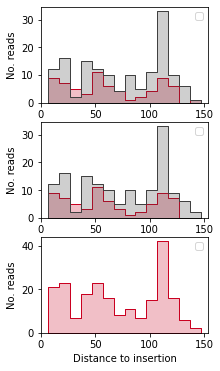

In [304]:
fig, axs = plt.subplots(nrows=3,ncols = 1,figsize=(3, 6),sharex='row')
sns.histplot(x='Dis_insertion', hue = 'Value',binwidth=10,
             data=examplemappingall2[examplemappingall2['Tool']==
                                                                                   'bcftools mul-ALT'],ax = axs[0],
               palette={'Reported':'#ca0020','Unreported':'#404040','Incorrectly reported':'#0571b0'},element="step")
axs[0].set_xlabel('Distance to insertion') 
axs[0].set_ylabel('No. reads') 
sns.histplot(x='Dis_insertion', hue = 'Value',binwidth=10,
             data=examplemappingall2[examplemappingall2['Tool']==
                                                                                   'bcftools indel'],ax = axs[1],
               palette={'Reported':'#ca0020','Unreported':'#404040','Incorrectly reported':'#0571b0'},element="step")
axs[1].set_xlabel('Distance to insertion (bp)') 
axs[1].set_ylabel('No. reads') 
sns.histplot(x='Dis_insertion', hue = 'Value',binwidth=10,
             data=examplemappingall2[examplemappingall2['Tool']==
                                                                                   'VARIANTS'],ax = axs[2],
               palette={'Reported':'#ca0020','Unreported':'#404040','Incorrectly reported':'#0571b0'},element="step")
axs[2].set_xlabel('Distance to insertion') 
axs[2].set_ylabel('No. reads') 
plt.sca(axs[0])
plt.legend(bbox_to_anchor=(1, 1.0))

plt.sca(axs[1])
plt.legend(bbox_to_anchor=(1, 1.0))
plt.sca(axs[2])
plt.legend(bbox_to_anchor=(1, 1.0))
plt.savefig('samtovcf/indelsvcfervsbcftools/readID3.pdf')


In [60]:
# compute distance between 2 reads
examplemapping = pd.read_csv('samtovcf/indelsvcfervsbcftools/examplereads.mapping.txt',sep='\t')
examplemapping = examplemapping[~examplemapping['readID'].isin(['all','allsub'])]
examplemapping['readID'] = examplemapping['readID'] + '_' + '1'
# examplemappingsub = examplemapping[examplemapping['readID'].isin(examplemapping['readID'])]
# examplemappingsub['readID'] = [x.replace('_1','_2') for x in examplemappingsub['readID']]
# examplemapping = examplemapping.append(examplemappingsub)
examplemappingall = examplemapping.loc[:,['readID','VCFer']]
examplemappingall['Tool']='VARIANTS'
examplemappingall['Value'] = [str(x).replace('True','Reported').replace('False','Unreported') for x in examplemappingall['VCFer']]
examplemappingall = examplemappingall.loc[:,['readID','Tool','Value']]

examplemappingsub = examplemapping.loc[:,['readID','bcftools (multi-alleles)']]
examplemappingsub['Tool']='bcftools mul-ALT'
examplemappingsub['Value'] = [str(x).replace('True','Reported').replace('False','Unreported') for x in examplemappingsub['bcftools (multi-alleles)']]
examplemappingsub = examplemappingsub.loc[:,['readID','Tool','Value']]
examplemappingall = examplemappingall.append(examplemappingsub)

examplemappingsub = examplemapping.loc[:,['readID','bcftools (default)']]
examplemappingsub['Tool']='bcftools default'
examplemappingsub['Value'] = [str(x).replace('True','Reported').replace('False','Unreported') for x in examplemappingsub['bcftools (default)']]
examplemappingsub = examplemappingsub.loc[:,['readID','Tool','Value']]
examplemappingall = examplemappingall.append(examplemappingsub)

examplemappingsub = examplemapping.loc[:,['readID','bcftools (indels)']]
examplemappingsub['Tool']='bcftools indel'
examplemappingsub['Value'] = [str(x).replace('True','Reported').replace('False','Unreported') for x in examplemappingsub['bcftools (indels)']]
examplemappingsub = examplemappingsub.loc[:,['readID','Tool','Value']]
examplemappingall = examplemappingall.append(examplemappingsub)

examplemappingall = examplemappingall.sort_values('readID',ascending=True)

def compute_dis(CHR1,POS1,read1_len,CHR2,POS2):
    POS1 = int(POS1)
    POS2 = int(POS2)
    if CHR1 == CHR2:
        return POS2-(POS1+read1_len)
    else:
        length1 = int(CHR1.split('size')[1])
        length2 = int(CHR2.split('size')[1])
        POS1 = min(abs(length1 - POS1),POS1 - 0)
        POS2 = min(abs(length2 - POS2),POS2 - 0)
        return POS1 + POS2 - read1_len
    
def compute_dis_sam(samfile):
    sam = pd.read_csv(samfile,sep='\t',header=None,comment = '@',usecols=[0,1,2,3,5, 9])
    dis_pairs = compute_dis(sam.loc[0,2],sam.loc[0,3],len(sam.loc[0,9]),sam.loc[1,2],sam.loc[1,3])
    return dis_pairs

examplemappingall['Dis_pairreads'] = 0
allsamfiles = glob.glob('samtovcf/indelsvcfervsbcftools/samfiles/*.sam')
for samfile in allsamfiles:
    readID = os.path.basename(samfile).split('.sam')[0] + '_1'
    examplemappingall.loc[examplemappingall['readID']==readID,'Dis_pairreads'] = compute_dis_sam(samfile)
examplemappingall.head()


readID              Tool       Value  Dis_pairreads
0    0_1          VARIANTS    Reported             46
0    0_1  bcftools default  Unreported             46
0    0_1    bcftools indel  Unreported             46
0    0_1  bcftools mul-ALT  Unreported             46
2  100_1  bcftools default  Unreported             28

In [61]:
examplemappingall.head(30)

readID              Tool       Value  Dis_pairreads
0    0_1          VARIANTS    Reported             46
0    0_1  bcftools default  Unreported             46
0    0_1    bcftools indel  Unreported             46
0    0_1  bcftools mul-ALT  Unreported             46
2  100_1  bcftools default  Unreported             28
2  100_1    bcftools indel  Unreported             28
2  100_1  bcftools mul-ALT  Unreported             28
2  100_1          VARIANTS    Reported             28
3  101_1  bcftools mul-ALT  Unreported            -60
3  101_1  bcftools default  Unreported            -60
3  101_1          VARIANTS    Reported            -60
3  101_1    bcftools indel  Unreported            -60
4  102_1  bcftools default  Unreported             76
4  102_1  bcftools mul-ALT  Unreported             76
4  102_1          VARIANTS    Reported             76
4  102_1    bcftools indel  Unreported             76
5  103_1  bcftools default  Unreported            -97
5  103_1          VARIANTS    Reported            -97
5  103_1    bcftools indel    Reported            -97
5  103_1  bcftools mul-ALT    Reported            -97
6  104_1  bcftools default  Unreported           -137
6  104_1    bcftools indel    Reported           -137
6  104_1          VARIANTS    Reported           -137
6  104_1  bcftools mul-ALT    Reported           -137
7  106_1          VARIANTS    Reported            -60
7  106_1    bcftools indel  Unreported            -60
7  106_1  bcftools default  Unreported            -60
7  106_1  bcftools mul-ALT  Unreported            -60
8  107_1    bcftools indel    Reported            -89
8  107_1  bcftools mul-ALT    Reported            -89

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


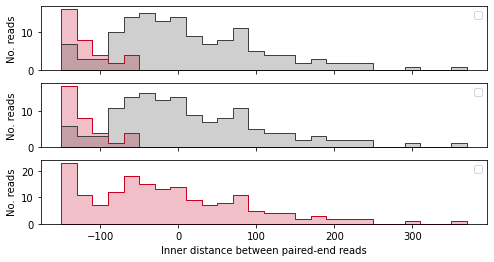

In [64]:
fig, axs = plt.subplots(nrows=3,ncols = 1,figsize=(8, 4),sharex='col')
sns.histplot(x='Dis_pairreads', hue = 'Value',binwidth=20,
             data=examplemappingall[examplemappingall['Tool']==
                                                                                   'bcftools mul-ALT'],ax = axs[0],
               palette={'Reported':'#ca0020','Unreported':'#404040','Incorrectly reported':'#0571b0'},element="step")
axs[0].set_xlabel('Distance between pair-end reads') 
axs[0].set_ylabel('No. reads') 
sns.histplot(x='Dis_pairreads', hue = 'Value',binwidth=20,
             data=examplemappingall[examplemappingall['Tool']==
                                                                                   'bcftools indel'],ax = axs[1],
               palette={'Reported':'#ca0020','Unreported':'#404040','Incorrectly reported':'#0571b0'},element="step")
axs[1].set_xlabel('Distance between pair-end reads') 
axs[1].set_ylabel('No. reads') 
sns.histplot(x='Dis_pairreads', hue = 'Value',binwidth=20,
             data=examplemappingall[examplemappingall['Tool']==
                                                                                   'VARIANTS'],ax = axs[2],
               palette={'Reported':'#ca0020','Unreported':'#404040','Incorrectly reported':'#0571b0'},element="step")
axs[2].set_xlabel('Inner distance between paired-end reads') 
axs[2].set_ylabel('No. reads') 
plt.sca(axs[0])
plt.legend(bbox_to_anchor=(1, 1.0))

plt.sca(axs[1])
plt.legend(bbox_to_anchor=(1, 1.0))
plt.sca(axs[2])
plt.legend(bbox_to_anchor=(1, 1.0))
plt.savefig('samtovcf/indelsvcfervsbcftools/readID4.pdf')


In [4]:
# covid 9452
def compute_dis(CHR1,POS1,CHR2,POS2):
    POS1 = int(POS1)
    POS2 = int(POS2)
    if CHR1 == CHR2:
        return abs(POS1 - POS2)
    else:
        length1 = int(CHR1.split('size')[1])
        length2 = int(CHR2.split('size')[1])
        POS1 = min(abs(length1 - POS1),POS1 - 0)
        POS2 = min(abs(length2 - POS2),POS2 - 0)
        return POS1 + POS2
    
def compute_dis_sam(samfile):
    sam = pd.read_csv(samfile,sep='\t',header=None,comment = '@',usecols=[0,1,2,3,5, 9])
    dis_pairs = compute_dis(sam.loc[0,2],sam.loc[0,3],sam.loc[1,2],sam.loc[1,3])
    return dis_pairs

allsamfiles = glob.glob('samtovcf/examplecovid//samfiles/*.sam')
for samfile in allsamfiles:
    readID = os.path.basename(samfile).split('.sam')[0] + '_1'
    print(samfile,compute_dis_sam(samfile))


samtovcf/examplecovid//samfiles/15.sam 139
samtovcf/examplecovid//samfiles/29.sam 248
samtovcf/examplecovid//samfiles/28.sam 243
samtovcf/examplecovid//samfiles/14.sam 139
samtovcf/examplecovid//samfiles/16.sam 71
samtovcf/examplecovid//samfiles/17.sam 250
samtovcf/examplecovid//samfiles/13.sam 139
samtovcf/examplecovid//samfiles/12.sam 139
samtovcf/examplecovid//samfiles/38.sam 166
samtovcf/examplecovid//samfiles/10.sam 140
samtovcf/examplecovid//samfiles/11.sam 254
samtovcf/examplecovid//samfiles/39.sam 198
samtovcf/examplecovid//samfiles/9.sam 287
samtovcf/examplecovid//samfiles/8.sam 145
samtovcf/examplecovid//samfiles/5.sam 25
samtovcf/examplecovid//samfiles/4.sam 25
samtovcf/examplecovid//samfiles/40.sam 423
samtovcf/examplecovid//samfiles/6.sam 145
samtovcf/examplecovid//samfiles/7.sam 145
samtovcf/examplecovid//samfiles/3.sam 497
samtovcf/examplecovid//samfiles/2.sam 53
samtovcf/examplecovid//samfiles/0.sam 119
samtovcf/examplecovid//samfiles/1.sam 119
samtovcf/examplecovid//sa

In [27]:
# exampleSNP depth
targetPOS = 36222
DP_indel = pd.read_csv('samtovcf/exampleSNP/DP_indel.txt',sep='\t',
                      comment = '#')
DP_default = pd.read_csv('samtovcf/exampleSNP/DP_default.txt',sep='\t',
                      comment = '#')
DP_bcf = pd.read_csv('samtovcf/exampleSNP/DP_bcf.txt',sep='\t',
                      comment = '#')
DP_indel.head()

POS   DP
0  36202  100
1  36203  102
2  36204  107
3  36205  107
4  36206  107

In [28]:
DP_variants = pd.read_csv('samtovcf/exampleSNP/allsub.vcfer.vcf',sep='\t',
                      comment = '#')
DP_variants = DP_variants[DP_variants['POS']<=targetPOS + 20][DP_variants['POS']>=targetPOS - 20]
newPOS = 193
DP_indel['POS']=DP_indel['POS']-targetPOS + newPOS
DP_default['POS']=DP_default['POS']-targetPOS + newPOS
DP_bcf['POS']=DP_bcf['POS']-targetPOS + newPOS
DP_variants['POS']=DP_variants['POS']-targetPOS + newPOS
DP_variants.head()

CHR    POS REF  ALT   DP DETAILS-MIDDLE  \
498  NODE_12_length_206813_cov_40.160886  36202   A  NaN  100        63,24.5   
499  NODE_12_length_206813_cov_40.160886  36203   T  NaN  102        63,24.5   
500  NODE_12_length_206813_cov_40.160886  36204   A  NaN  107      61.5,24.5   
501  NODE_12_length_206813_cov_40.160886  36205   G    C  107  60.5,24.5;1,0   
502  NODE_12_length_206813_cov_40.160886  36206   A  NaN  107        61,24.5   

    DETAILS-ENDS                                            SUPPORT  
498        6.5,6                                                NaN  
499        8,6.5                                                NaN  
500         8,13                                                NaN  
501     8,13;0,0  ATGCAGTACCTCAAGGAAGAATGTATTACACCTGTGTTCTCTAAAG...  
502       8,13.5                                                NaN

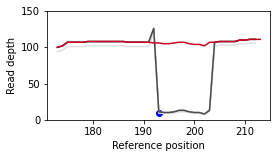

In [115]:
fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(4, 2))
sns.lineplot(x='POS', y = 'DP',
             data=DP_indel,ax = axs,color = '#878787')
sns.lineplot(x='POS', y = 'DP',
             data=DP_default,ax = axs,color = '#e0e0e0')
sns.lineplot(x='POS', y = 'DP',
             data=DP_bcf,ax = axs,color = '#4d4d4d')
sns.lineplot(x='POS', y = 'DP',
             data=DP_variants,ax = axs,color = '#ca0020')
axs.set_xlabel('Reference position') 
axs.set_ylabel('Read depth') 
# plt.sca(axs)
# plt.legend(bbox_to_anchor=(1, 1.0))
axs.set_ylim([0,150])
plt.scatter( newPOS, 10, color='blue')
plt.savefig('samtovcf/exampleSNP/DP.pdf')


In [126]:
#INDEL MAF
indelmaf = pd.read_csv('samtovcf/indelsvcfervsbcftools//modelindelsumall.txt',sep='\t')
indelmaf['VCF caller'] = ''
indelmaf['VCF caller']=[x.replace('bowtie2 VARIANTS','VARIANTS'
                            ).replace('minimap2 VARIANTS','VARIANTS'
                                     ).replace('bwa VARIANTS','VARIANTS'
                                              ).replace('bowtie2 indel','bcftools indel'
                            ).replace('minimap2 indel','bcftools indel'
                                     ).replace('bwa indel','bcftools indel'
                                              ).replace('bowtie2 bcfdefault','bcftools default'
                            ).replace('minimap2 bcfdefault','bcftools default'
                                     ).replace('bwa bcfdefault','bcftools default'
                                              ).replace('bowtie2','bcftools Mul-ALT'
                            ).replace('minimap2','bcftools Mul-ALT'
                                     ).replace('bwa','bcftools Mul-ALT'
                                              ) for x in indelmaf['Tool']]
indelmaf['Tool'] = [x.split(' ')[0] for x in indelmaf['Tool']]
indelmaf=indelmaf[indelmaf['Sample']!='am_AkMu_g0002.fasta.corrected.0.SNP.fasta']
indelmaf=indelmaf[indelmaf['Sample']!='am_BaOv_g0001.fasta.corrected.0.SNP.fasta']

indelmaf.head()

MAF                                         Sample      Tool  FN   TP  \
5  0.05  am_AkMu_g0002.fasta.corrected.4e-02.SNP.fasta   bowtie2  53  159   
6  0.05  am_AkMu_g0002.fasta.corrected.4e-02.SNP.fasta   bowtie2  15  196   
7  0.05  am_AkMu_g0002.fasta.corrected.4e-02.SNP.fasta   bowtie2  87  114   
8  0.05  am_AkMu_g0002.fasta.corrected.4e-02.SNP.fasta   bowtie2  54  154   
9  0.05  am_AkMu_g0002.fasta.corrected.4e-02.SNP.fasta  minimap2  54  154   

   FP_samePOS  FP_diffPOS        VCF caller  
5          30          55  bcftools Mul-ALT  
6          28          26          VARIANTS  
7          16          10  bcftools default  
8          19          49    bcftools indel  
9          19          49    bcftools indel

In [128]:
indelmaf.tail()

MAF                                         Sample      Tool   FN  TP  \
195  1.0  am_AkMu_g0002.fasta.corrected.4e-02.SNP.fasta   bowtie2  200   0   
196  1.0  am_AkMu_g0002.fasta.corrected.4e-02.SNP.fasta   bowtie2  111  89   
197  1.0  am_AkMu_g0002.fasta.corrected.4e-02.SNP.fasta   bowtie2  200   0   
198  1.0  am_AkMu_g0002.fasta.corrected.4e-02.SNP.fasta   bowtie2  179  21   
199  1.0  am_AkMu_g0002.fasta.corrected.4e-02.SNP.fasta  minimap2  179  21   

     FP_samePOS  FP_diffPOS        VCF caller  
195           0           0  bcftools Mul-ALT  
196          10           4          VARIANTS  
197           0           0  bcftools default  
198           2           8    bcftools indel  
199           2           8    bcftools indel

In [129]:
print(87/15,54/15,200/111,179/111)

5.8 3.6 1.8018018018018018 1.6126126126126126


In [130]:
print(49/26,8/4)

1.8846153846153846 2.0


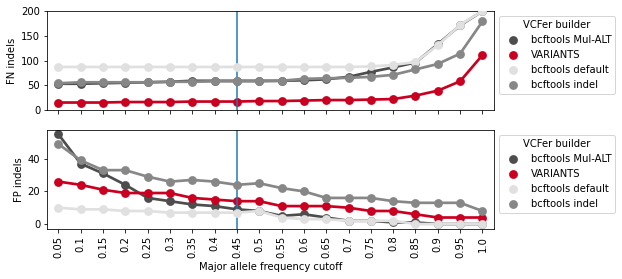

In [127]:
pallete_set = {
        'VARIANTS':'#ca0020','bcftools Mul-ALT':'#4d4d4d','bcftools default':'#e0e0e0','bcftools indel':'#878787'}

fig, axs = plt.subplots(nrows=2,ncols = 1,figsize=(8, 4),sharex='col')
sns.pointplot(data = indelmaf,
                y='FN',x='MAF',hue = 'VCF caller', ax=axs[0],
           palette=pallete_set)
axs[0].axvline(x=8)

axs[0].set_ylabel('FN indels') 
axs[0].set_xlabel('')
axs[0].set_ylim([0,200])
plt.sca(axs[0])
plt.legend(bbox_to_anchor=(1.0, 1.0),title='VCFer builder')  
plt.xticks(rotation=90)
sns.pointplot(data = indelmaf,
                y='FP_diffPOS',x='MAF',hue = 'VCF caller', ax=axs[1],
           palette=pallete_set)
axs[1].axvline(x=8)

axs[1].set_ylabel('FP indels') 
axs[1].set_xlabel('Major allele frequency cutoff')
plt.sca(axs[1])
plt.legend(bbox_to_anchor=(1.0, 1.0),title='VCFer builder')  
plt.xticks(rotation=90)

plt.savefig('samtovcf/indelsvcfervsbcftools/MAF.pdf')


In [2]:
#INDEL MAF COVID
indelmaf = pd.read_csv('samtovcf/examplecovid//modelindelsumall.txt',sep='\t')
indelmaf['VCF caller'] = ''
indelmaf['VCF caller']=[x.replace('bowtie2 VARIANTS','VARIANTS'
                            ).replace('minimap2 VARIANTS','VARIANTS'
                                     ).replace('bwa VARIANTS','VARIANTS'
                                              ).replace('bowtie2 indel','bcftools indel'
                            ).replace('minimap2 indel','bcftools indel'
                                     ).replace('bwa indel','bcftools indel'
                                              ).replace('bowtie2 bcfdefault','bcftools default'
                            ).replace('minimap2 bcfdefault','bcftools default'
                                     ).replace('bwa bcfdefault','bcftools default'
                                              ).replace('bowtie2','bcftools Mul-ALT'
                            ).replace('minimap2','bcftools Mul-ALT'
                                     ).replace('bwa','bcftools Mul-ALT'
                                              ) for x in indelmaf['Tool']]
indelmaf['Tool'] = [x.split(' ')[0] for x in indelmaf['Tool']]
indelmaf=indelmaf[indelmaf['Sample']!='am_AkMu_g0002.fasta.corrected.0.SNP.fasta']
indelmaf.head()

MAF                            Sample      Tool  FN  TP  FP_samePOS  \
0  0.05  SRR10971381.fasta.200.SNP1.fasta  minimap2   0  20           0   
1  0.05  SRR10971381.fasta.200.SNP1.fasta  minimap2   2  18           2   
2  0.05  SRR10971381.fasta.200.SNP1.fasta  minimap2   0  20           0   
3  0.05  SRR10971381.fasta.200.SNP1.fasta  minimap2   0  20           0   
4  0.10  SRR10971381.fasta.200.SNP1.fasta  minimap2   0  20           0   

   FP_diffPOS        VCF caller  
0           1  bcftools Mul-ALT  
1           1          VARIANTS  
2           0  bcftools default  
3           1    bcftools indel  
4           0  bcftools Mul-ALT

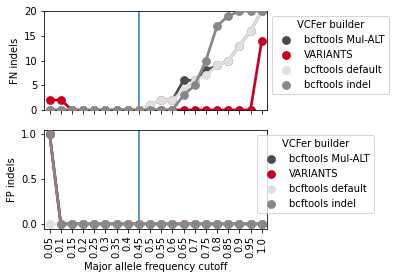

In [37]:
pallete_set = {
        'VARIANTS':'#ca0020','bcftools Mul-ALT':'#4d4d4d','bcftools default':'#e0e0e0','bcftools indel':'#878787'}

fig, axs = plt.subplots(nrows=2,ncols = 1,figsize=(4, 4),sharex='col')
sns.pointplot(data = indelmaf,
                y='FN',x='MAF',hue = 'VCF caller', ax=axs[0],
           palette=pallete_set)
axs[0].axvline(x=8)

axs[0].set_ylabel('FN indels') 
axs[0].set_xlabel('')
axs[0].set_ylim([0,20])
plt.sca(axs[0])
plt.legend(bbox_to_anchor=(1.0, 1.0),title='VCFer builder')  
plt.xticks(rotation=90)
sns.pointplot(data = indelmaf,
                y='FP_diffPOS',x='MAF',hue = 'VCF caller', ax=axs[1],
           palette=pallete_set)
axs[1].axvline(x=8)

axs[1].set_ylabel('FP indels') 
axs[1].set_xlabel('Major allele frequency cutoff')
plt.sca(axs[1])
plt.legend(bbox_to_anchor=(1.5, 1.0),title='VCFer builder')  
plt.xticks(rotation=90)

plt.savefig('samtovcf/examplecovid//MAF.pdf')


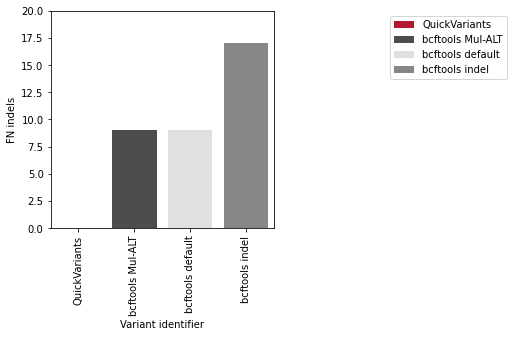

In [11]:
pallete_set = {
        'QuickVariants':'#ca0020','bcftools Mul-ALT':'#4d4d4d','bcftools default':'#e0e0e0','bcftools indel':'#878787'}
indelmaf['VCF caller'] = [x.replace('VARIANTS','QuickVariants') for x in indelmaf['VCF caller']]
fig, axs = plt.subplots(nrows=1,ncols = 1,figsize=(4, 4),sharex='col')
indelmaf2 = indelmaf[indelmaf['VCF caller']=='QuickVariants']
indelmaf2 = indelmaf2.append(indelmaf[indelmaf['VCF caller']!='QuickVariants'])

sns.barplot(data = indelmaf2[indelmaf2['MAF']==0.8],
                y='FN',x='VCF caller',hue = 'VCF caller', ax=axs,dodge=False,
           palette=pallete_set)

axs.set_ylabel('FN indels') 
axs.set_xlabel('Variant identifier')
axs.set_ylim([0,20])
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.5, 1.0))  
plt.savefig('samtovcf/examplecovid//COVID.pdf')
